In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

In [33]:
def model_ols(y, x):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

def show(data, y_symbol, x_symbol):
    y = data[y_symbol]
    x = data[x_symbol]
    
    model=model_ols(y, x)
    std = statistics.stdev(model.resid)
    entry_threshold = 2 # entrada em 2 desvio padrão

    #plt.figure(figsize=(15,6))
    plt.figure(figsize=(10,5))
    plt.plot(model.resid)
    plt.ylabel('Residual')
    plt.title(y_symbol + ' / ' + x_symbol)

    plt.axhline(0, color='black',label='mean',linestyle='--') # Add the mean of residual
    plt.axhline(entry_threshold*std, color='green', linestyle='--',label='trade')
    plt.axhline(-entry_threshold*std, color='green', linestyle='--')

    plt.legend()
    plt.show()

In [34]:
pairs = pd.read_csv('datasets/cointegrated_pairs.csv', index_col=0)
data = pd.read_csv('datasets/data.csv', index_col=0)
pairs.shape, data.shape

((5410, 10), (352, 202))

In [35]:
df_hurst = pairs.loc[(pairs['Hurst'] > 0) & (pairs['Hurst'] < 0.4)]

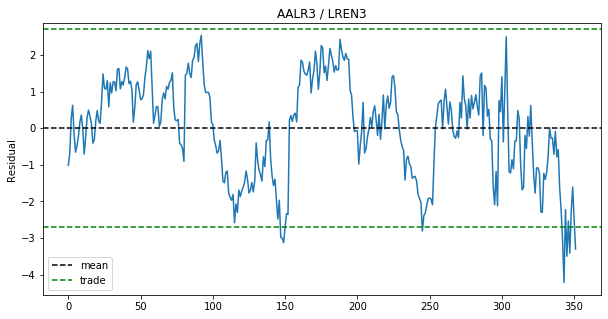

In [36]:
show(data, 'AALR3', 'LREN3')

In [37]:
corr = df_hurst.loc[(df_hurst['Corr'] >= 0.95)]
corr

Dependente Independente    pValue  ADFStatistic      Beta  HalfLife  \
315       AZUL4        OFSA3  0.005617     -3.607626  2.045819         9   
345       BBAS3        EMBR3  0.002936     -3.797217  1.945949         8   
346       BBAS3        ITUB3  0.018221     -3.231706  2.272663        11   
347       BBAS3        ITUB4  0.023133     -3.149003  1.600146        13   
353       BBAS3        SANB4  0.000909     -4.116548  2.359072         7   
...         ...          ...       ...           ...       ...       ...   
4934      UNIP3        UNIP6  0.000902     -4.118640  0.741770         4   
4949      UNIP6        UNIP3  0.001781     -3.936587  1.243843         5   
4988      USIM5        MYPK3  0.000279     -4.414961  0.451947         6   
5370      WIZS3        DIRR3  0.000012     -5.140907  0.864986         5   
5381      WIZS3        MOVI3  0.000006     -5.287599  0.638686         5   

         Hurst      Corr Signal  SignalPerc  
315   0.395401  0.953627     LS    0.782156  
345   0.374262  0.954310     SL    0.890184  
346   0.268954  0.952397     LS    0.190027  
347   0.339675  0.950760     LS    0.089278  
353   0.350593  0.955723     SL    0.285146  
...        ...       ...    ...         ...  
4934  0.227939  0.960544     SL    0.489362  
4949  0.203713  0.960544     LS    0.683302  
4988  0.238674  0.958724     SL    1.317986  
5370  0.306183  0.960879     LS    0.331507  
5381  0.263177  0.963900     SL    0.281916  

[181 rows x 10 columns]

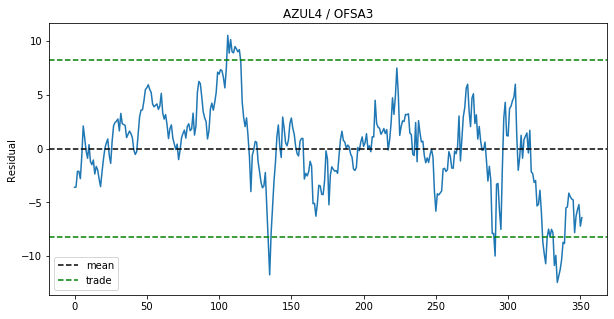

In [39]:
show(data, 'AZUL4', 'OFSA3')

In [45]:
corr.loc[(df_hurst['SignalPerc'] >= 1)]

Dependente Independente    pValue  ADFStatistic      Beta  HalfLife  \
738       BRML3        LREN3  0.002091     -3.892497  0.388807         6   
740       BRML3        MULT3  0.000181     -4.519791  0.619347         6   
1100      CSAN3        JHSF3  0.013749     -3.326164  5.834939         8   
1101      CSAN3        JSLG3  0.011864     -3.374364  1.592279         8   
1197      DIRR3        JPSA3  0.013237     -3.338651  0.443707         8   
1441      EMBR3        BBAS3  0.005273     -3.626576  0.468001         8   
1906      EZTC3        HBOR3  0.000582     -4.231639  9.144447         7   
2282      HBOR3        EZTC3  0.000801     -4.149706  0.103989         7   
2285      HBOR3        LOGG3  0.005759     -3.600109  0.213493         7   
2680      JPSA3        DIRR3  0.019976     -3.200146  2.038739         8   
2696      JPSA3        ROMI3  0.002447     -3.848605  1.864297         6   
2710      JSLG3        CSAN3  0.012941     -3.346053  0.579340         8   
2869      LOGG3        HBOR3  0.002419     -3.851817  4.257305         6   
3218      MYPK3        USIM5  0.000415     -4.317110  2.033759         6   
3759      RAIL3        RLOG3  0.001737     -3.943462  0.880432         4   
3859      RLOG3        RAIL3  0.002352     -3.859782  1.090417         4   
3884      ROMI3        JPSA3  0.001200     -4.043273  0.484456         6   
4988      USIM5        MYPK3  0.000279     -4.414961  0.451947         6   

         Hurst      Corr Signal  SignalPerc  
738   0.223352  0.958791     LS    1.141917  
740   0.133724  0.978512     LS    1.044678  
1100  0.343591  0.958534     SL    1.092008  
1101  0.236218  0.960454     SL    1.170744  
1197  0.349517  0.951106     SL    1.005278  
1441  0.367744  0.954310     LS    1.184465  
1906  0.269862  0.975152     SL    1.074789  
2282  0.273543  0.975152     LS    1.075621  
2285  0.216252  0.953365     LS    1.283076  
2680  0.356980  0.951106     LS    1.089362  
2696  0.279760  0.950353     LS    1.114727  
2710  0.252683  0.960454     LS    1.030673  
2869  0.218863  0.953365     SL    1.306486  
3218  0.252407  0.958724     LS    1.486186  
3759  0.211121  0.979816     SL    1.107855  
3859  0.199469  0.979816     LS    1.072876  
3884  0.302591  0.950353     SL    1.031716  
4988  0.238674  0.958724     SL    1.317986

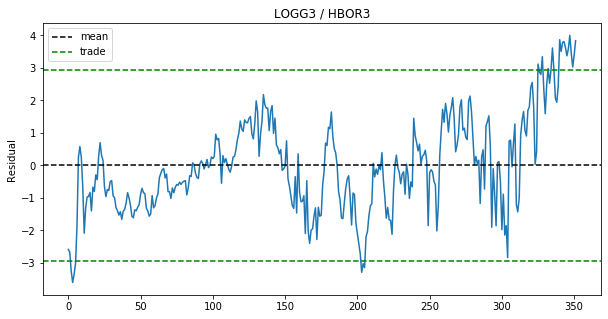

In [47]:
show(data, 'LOGG3', 'HBOR3')

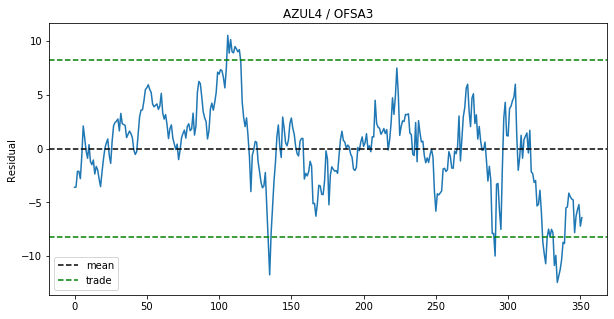

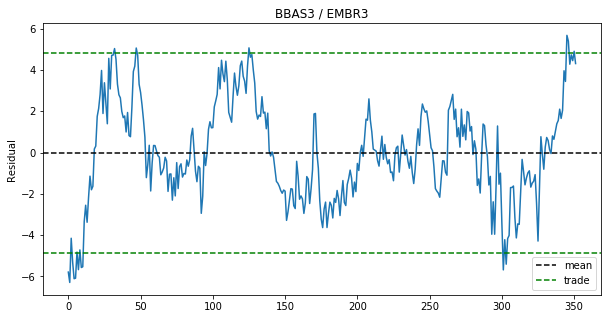

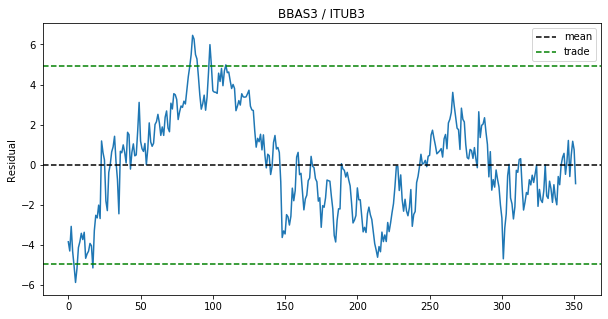

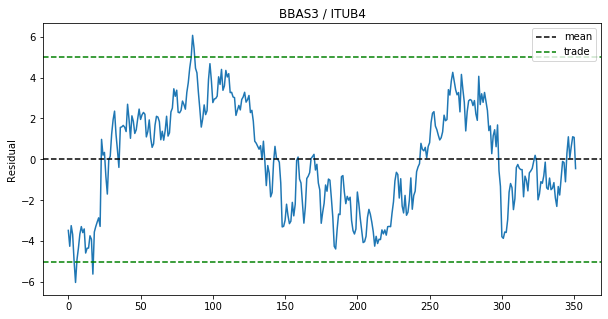

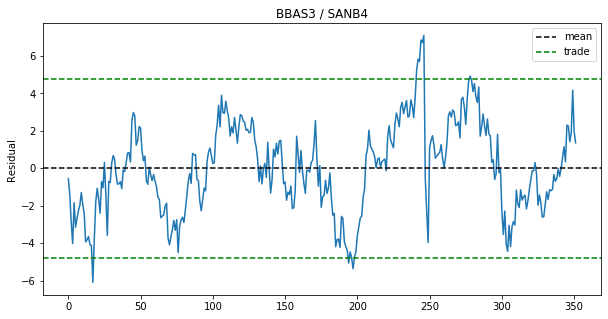

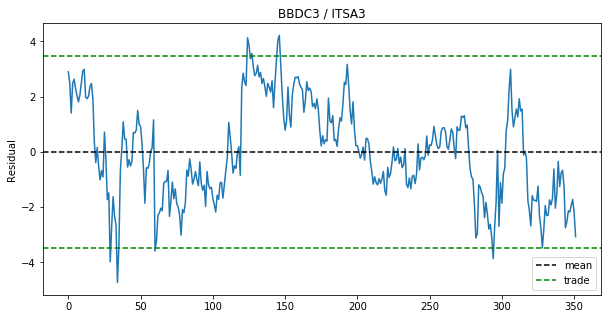

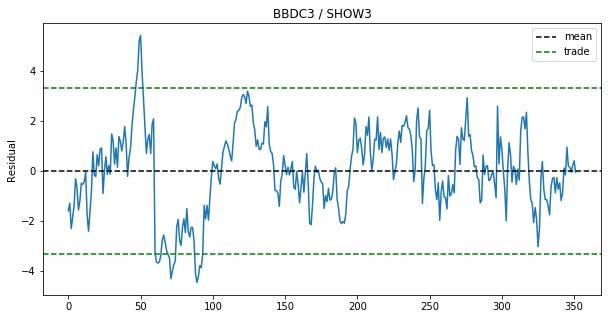

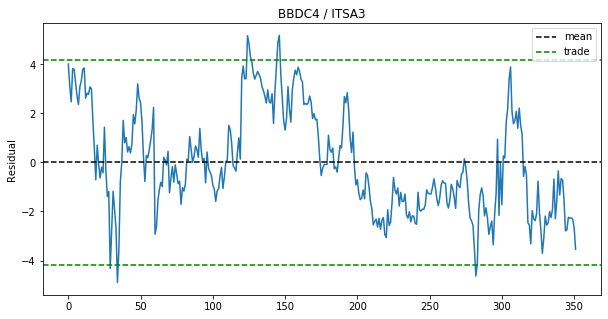

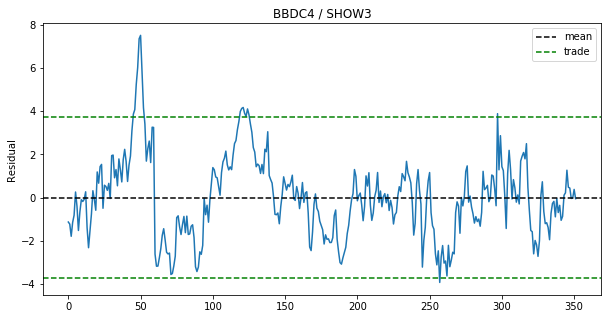

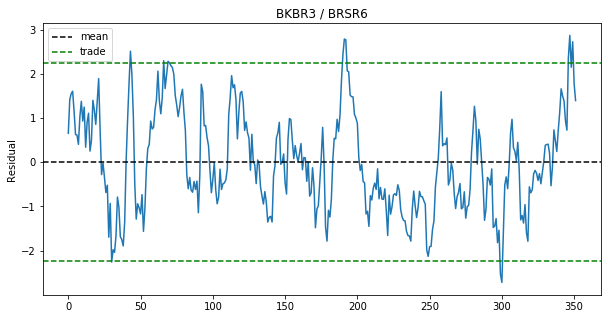

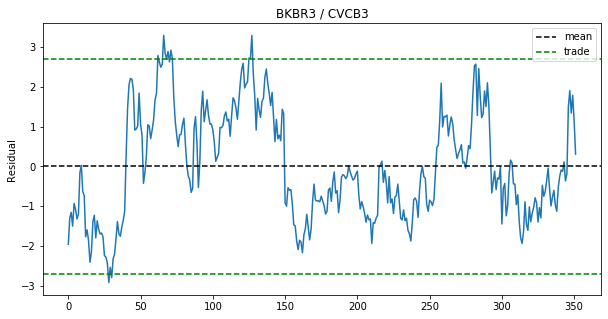

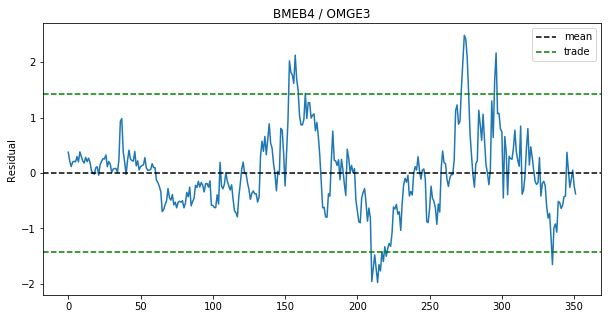

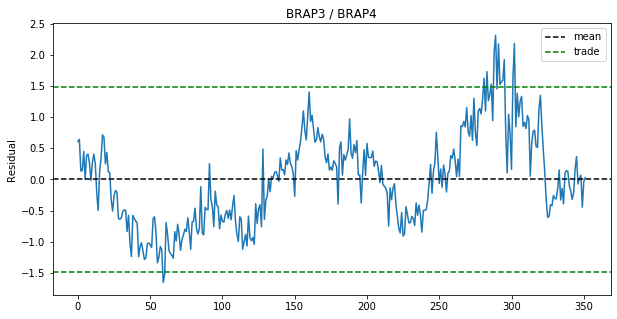

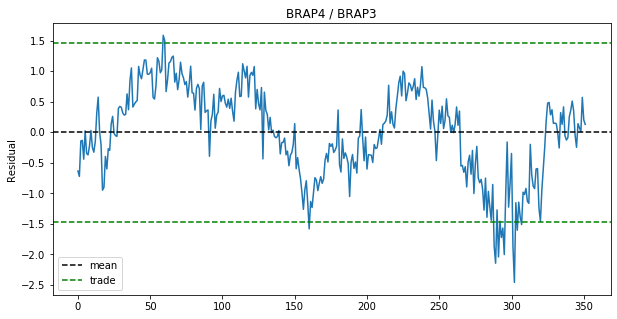

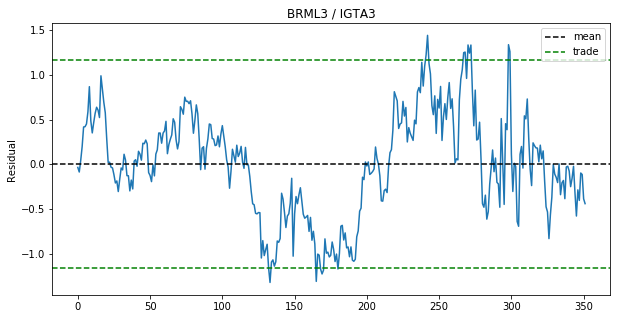

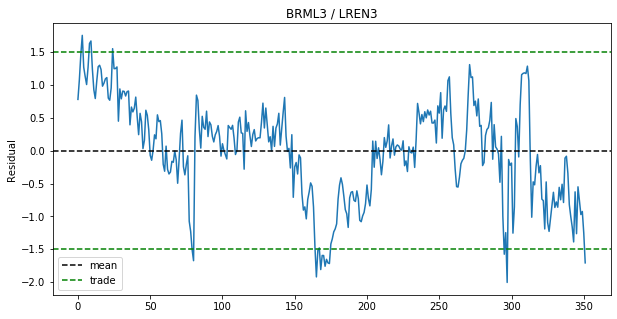

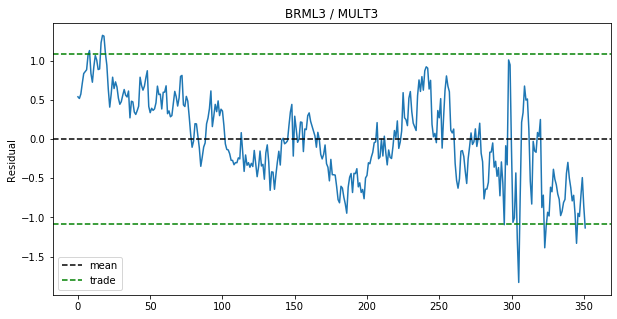

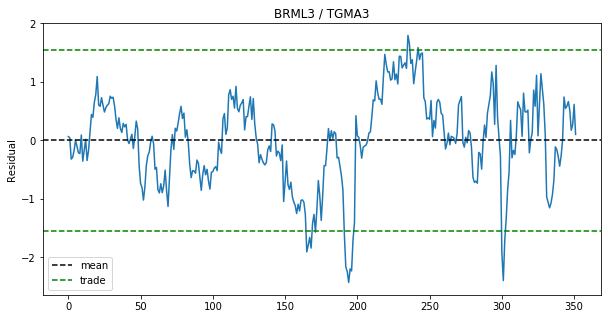

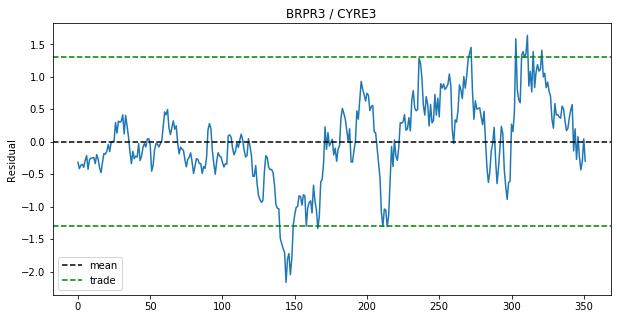

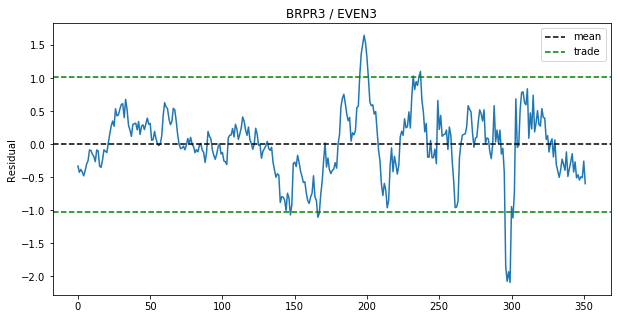

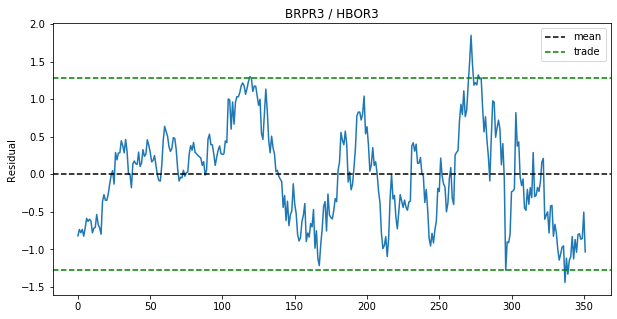

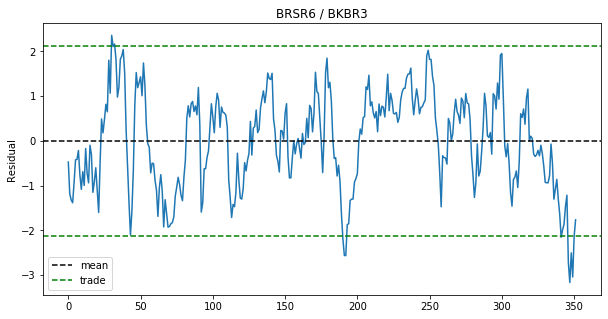

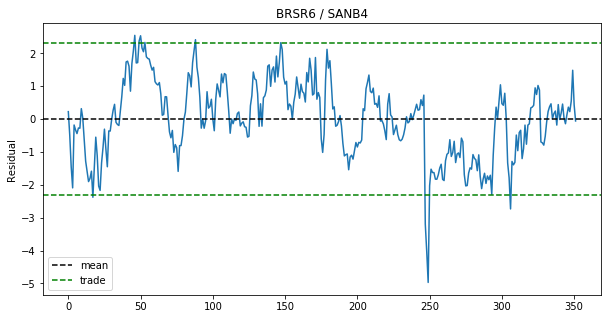

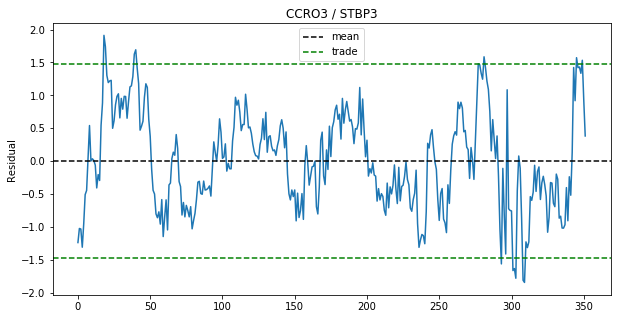

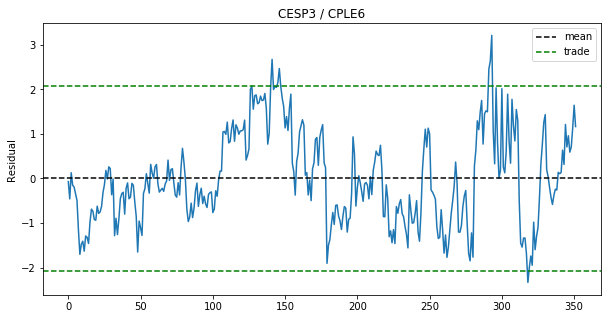

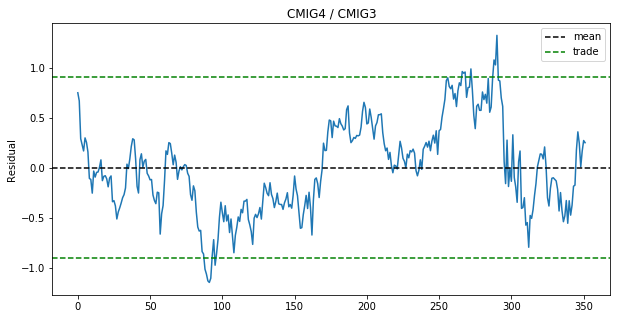

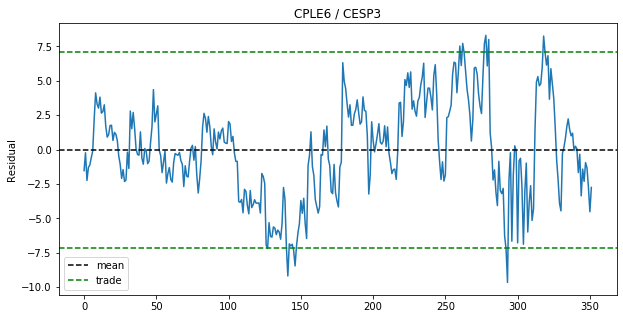

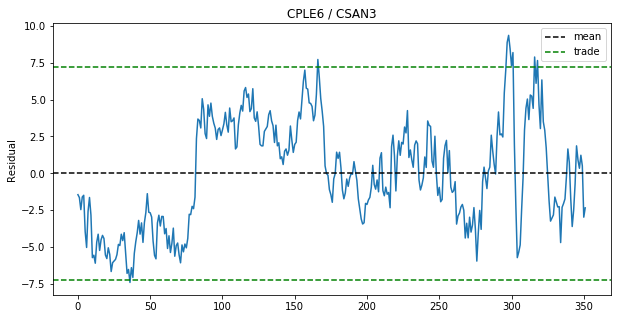

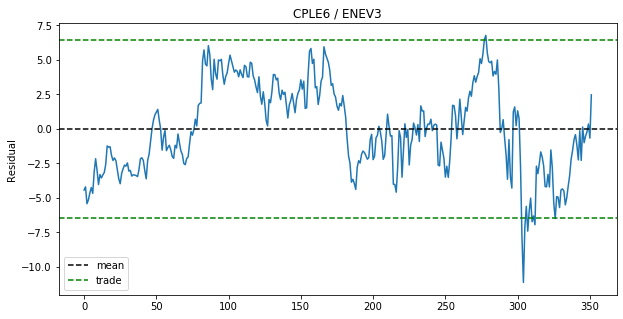

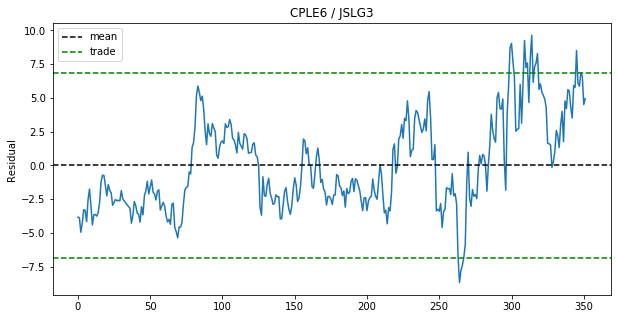

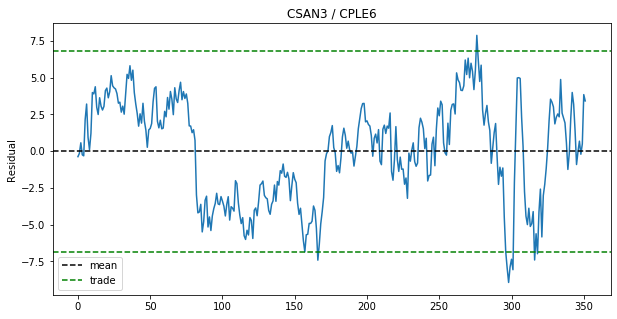

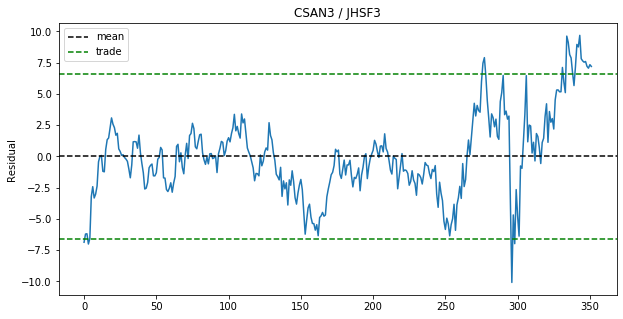

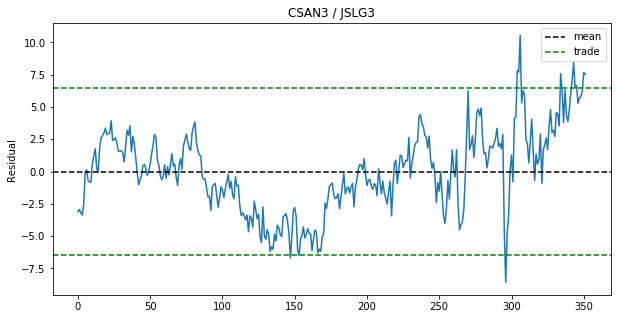

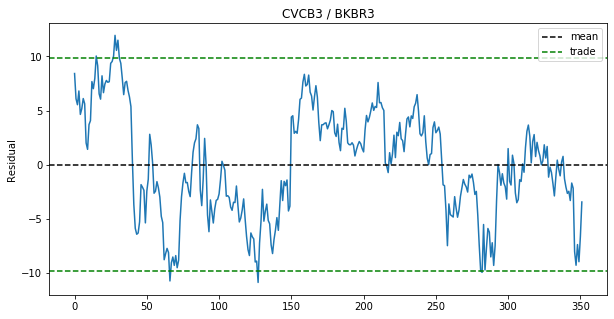

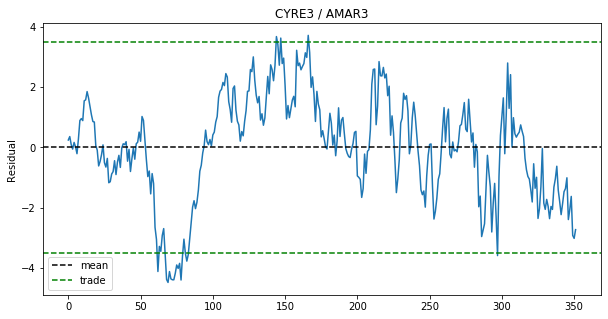

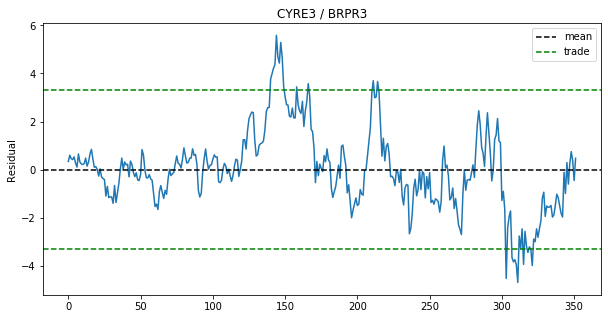

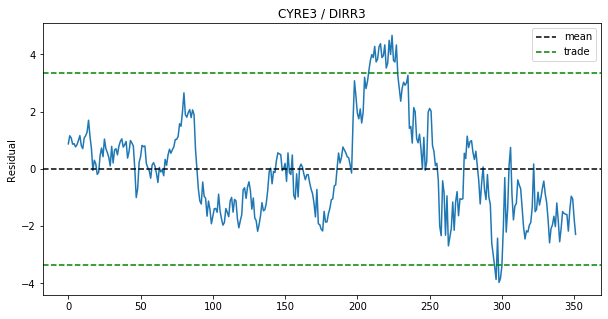

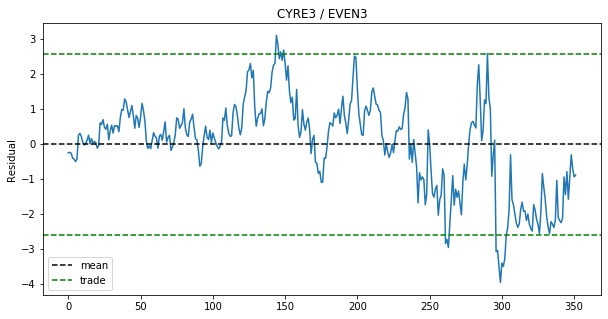

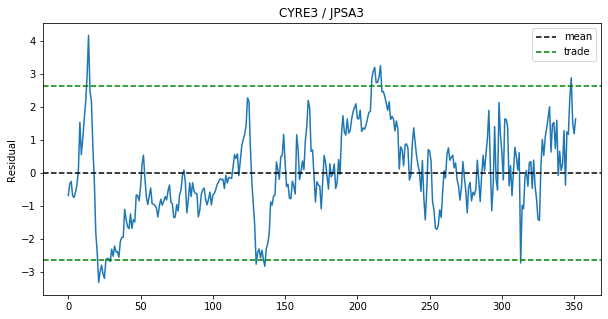

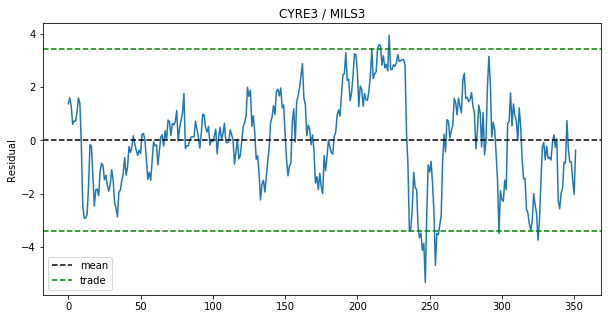

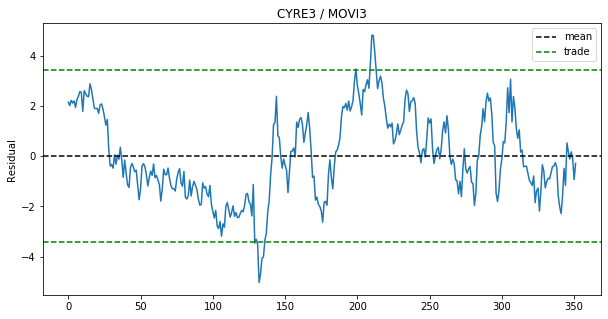

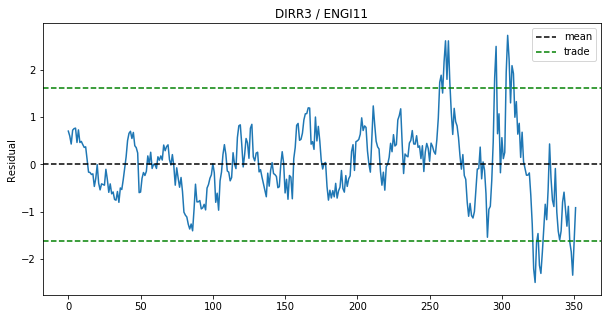

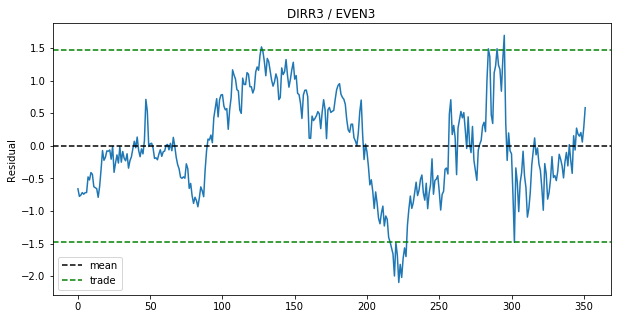

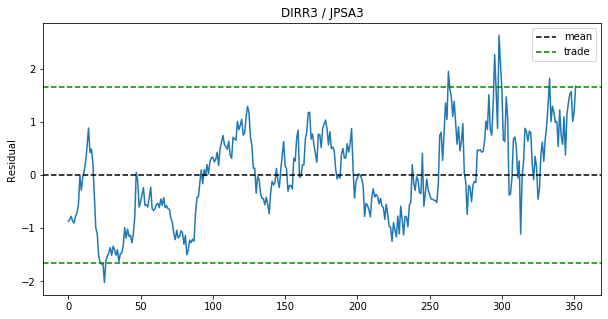

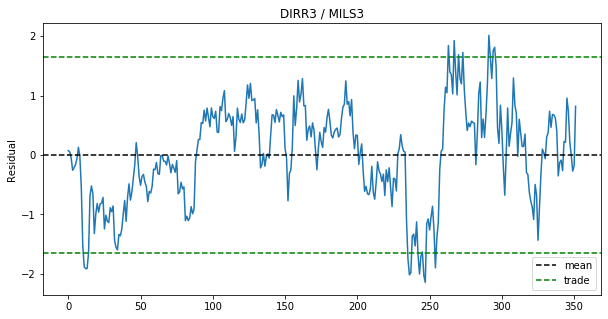

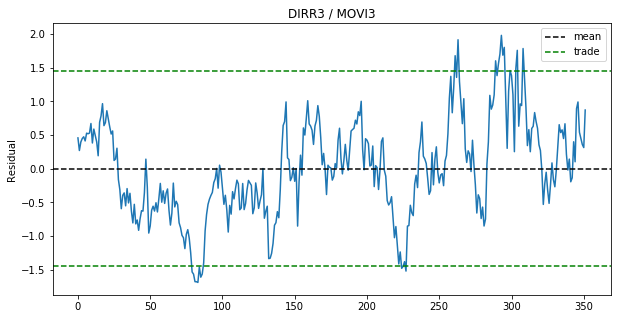

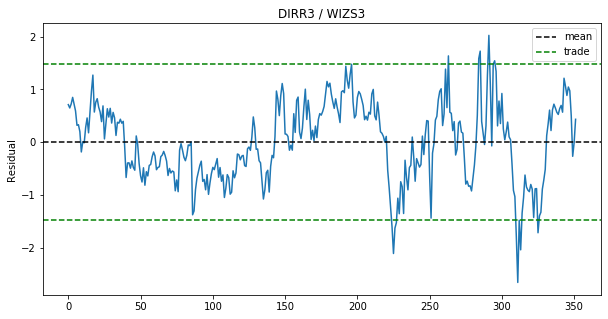

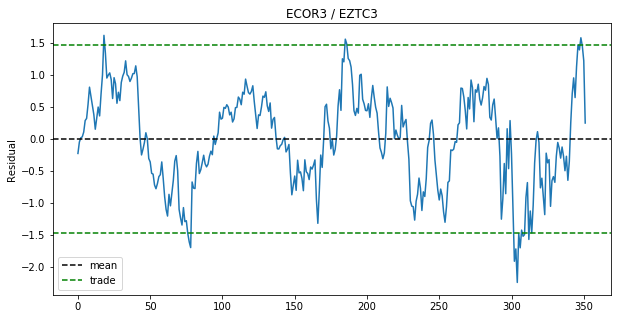

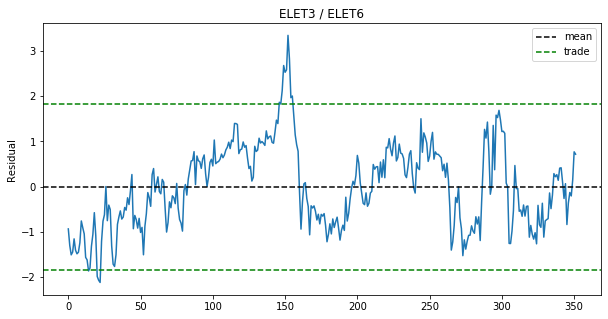

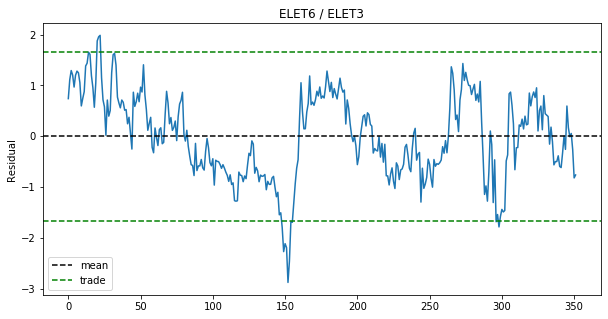

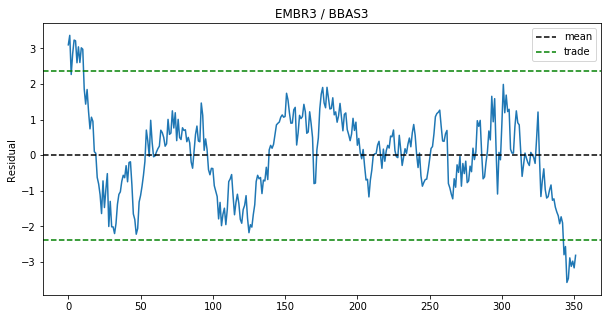

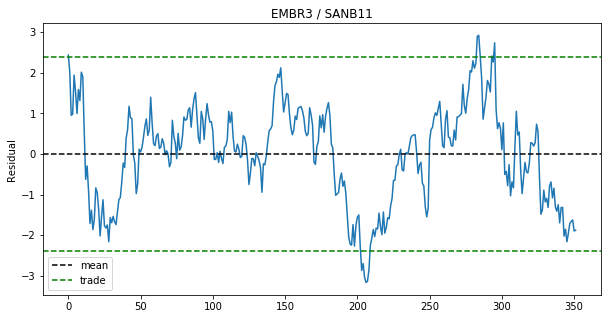

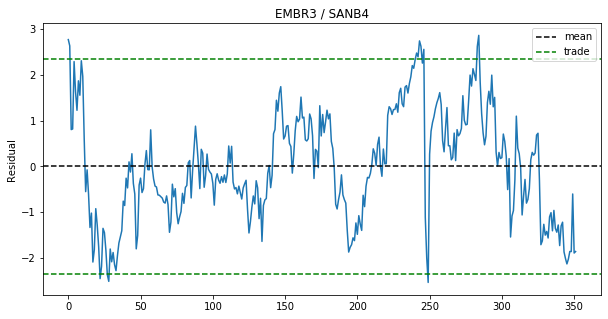

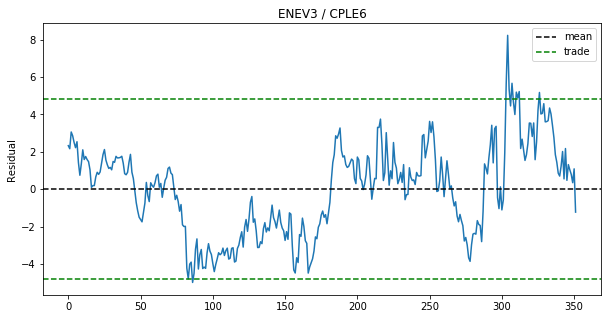

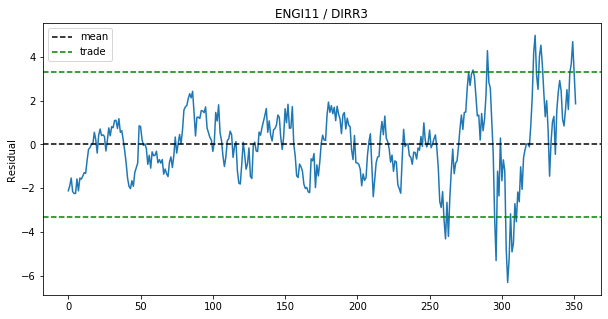

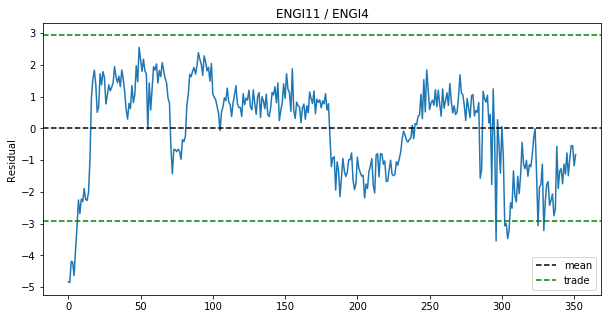

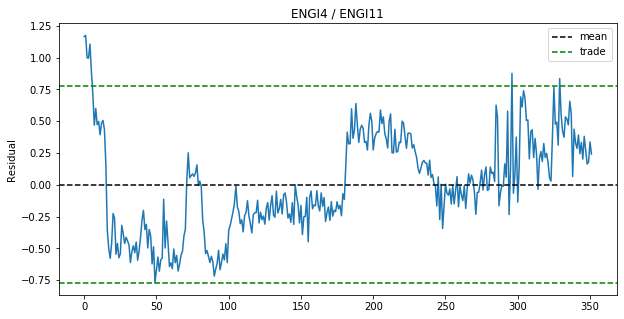

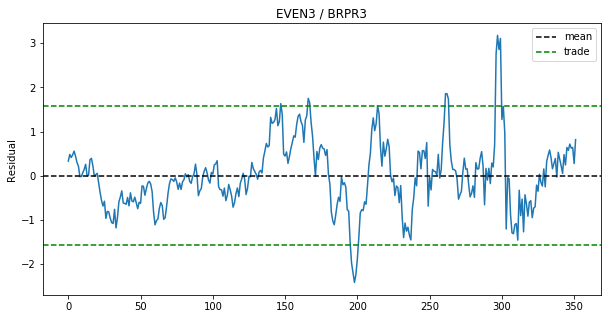

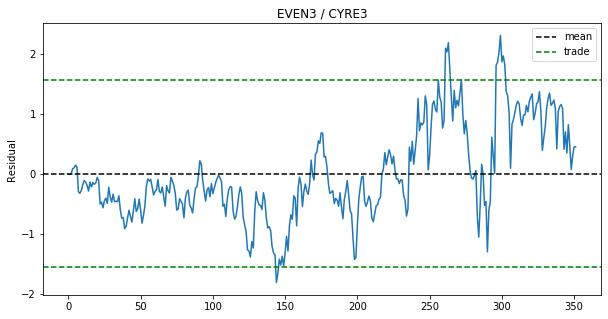

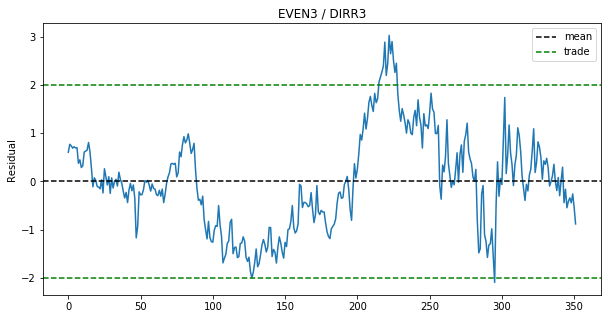

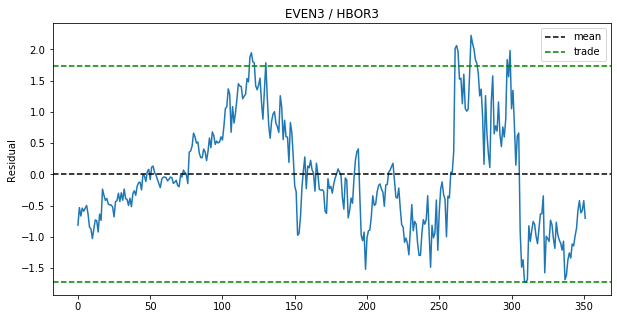

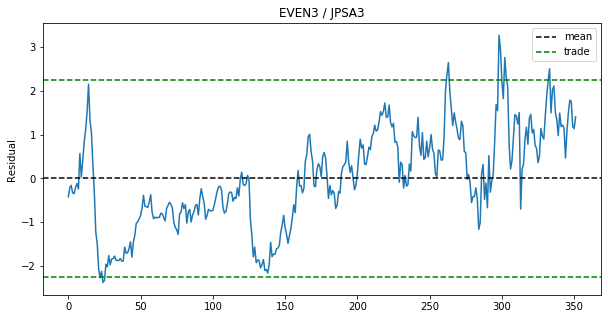

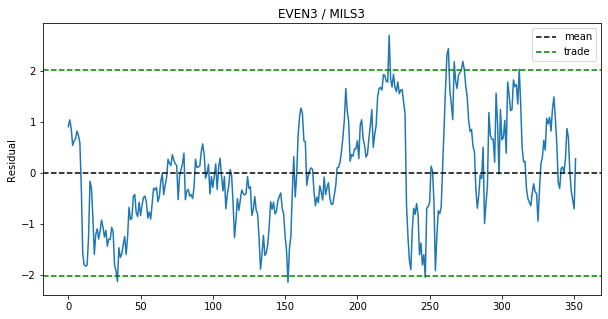

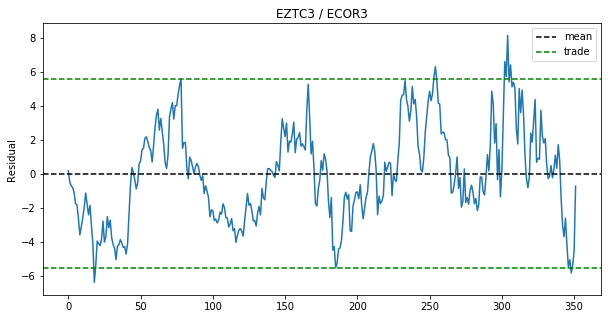

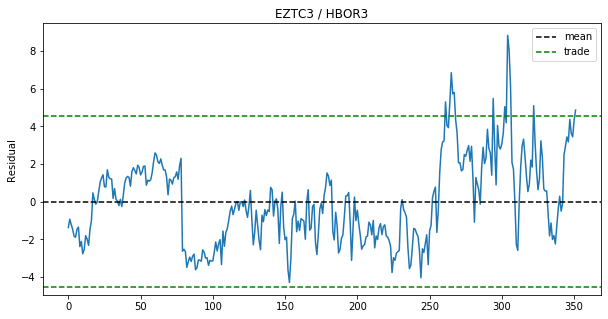

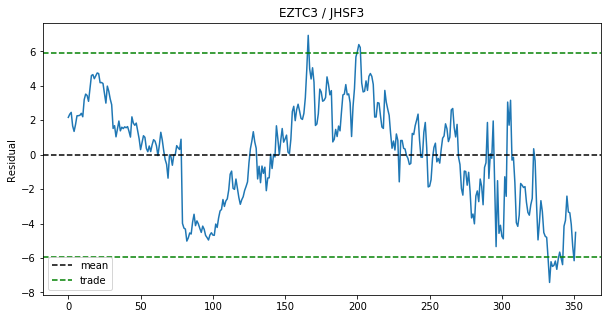

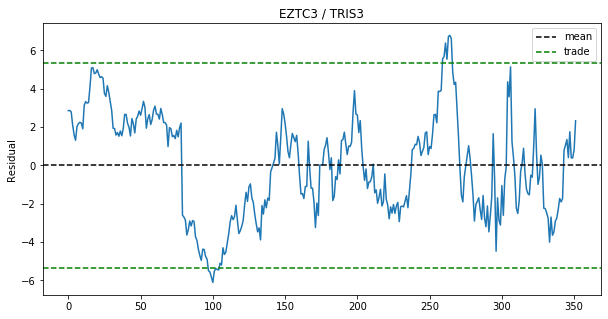

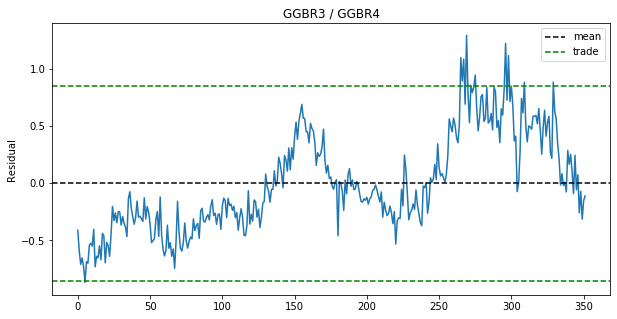

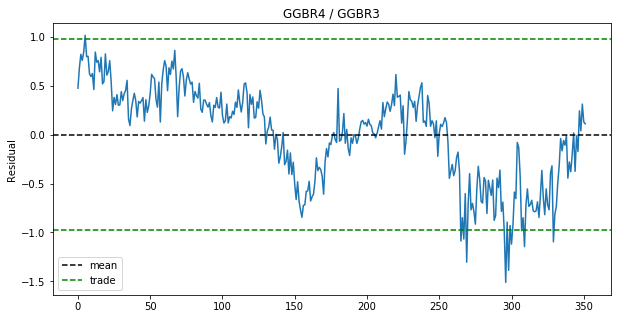

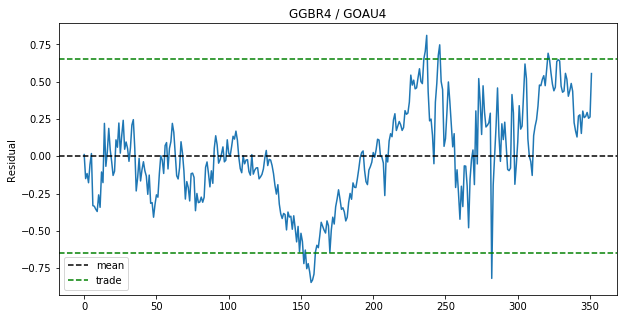

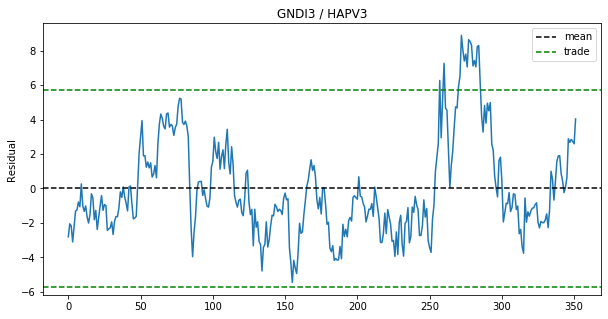

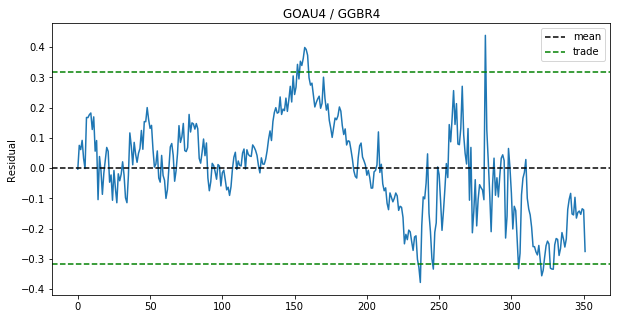

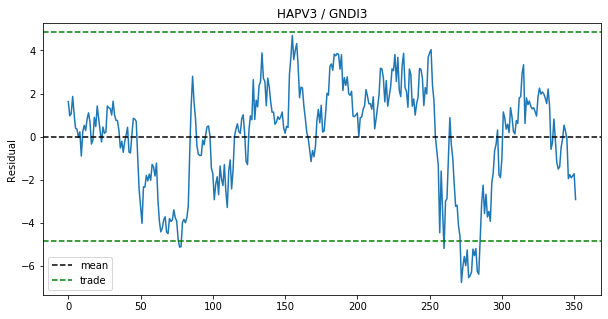

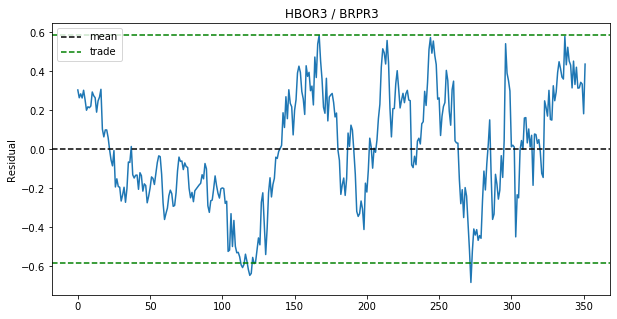

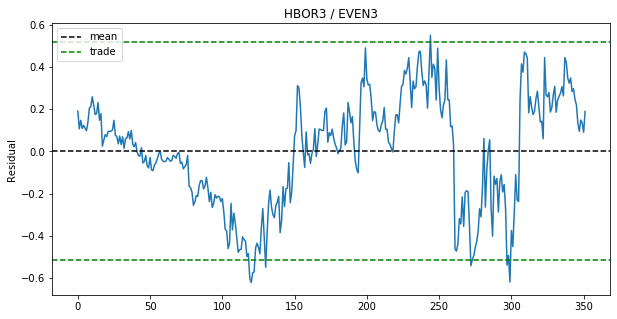

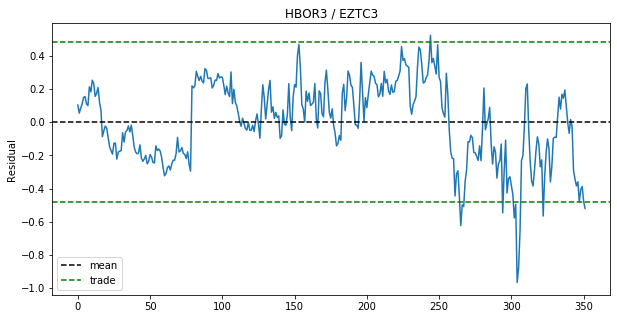

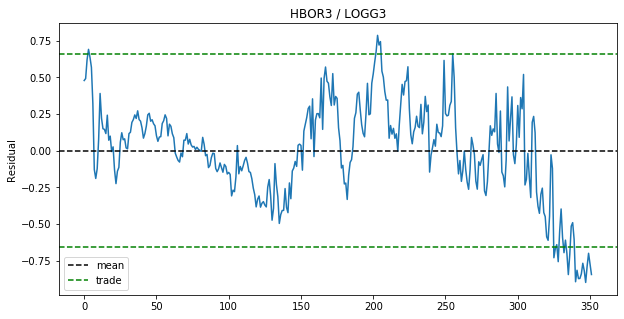

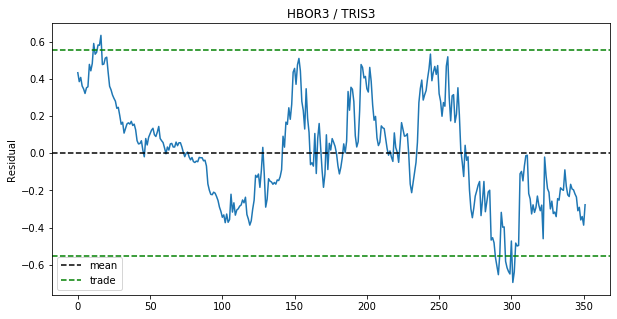

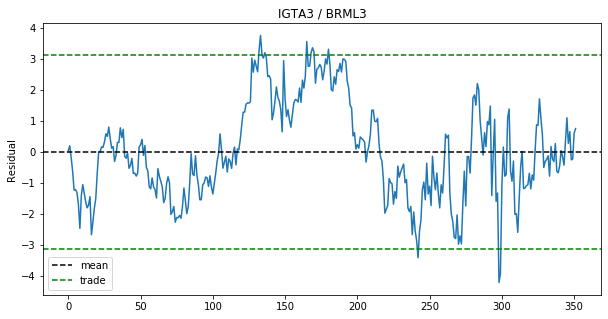

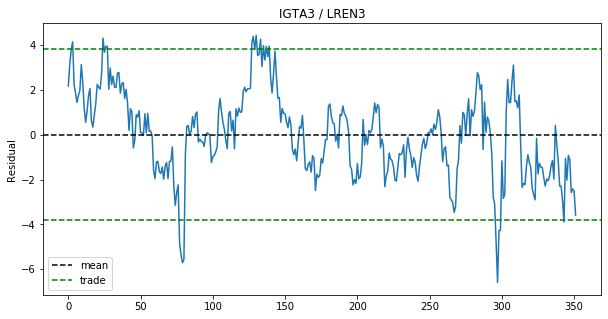

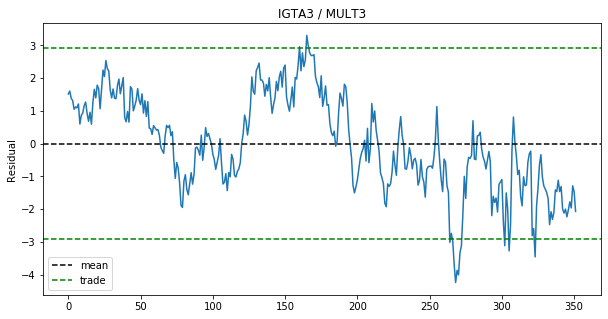

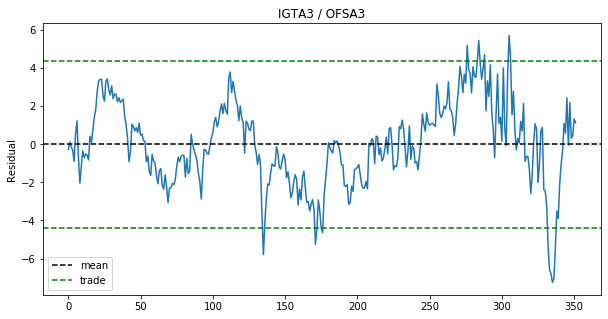

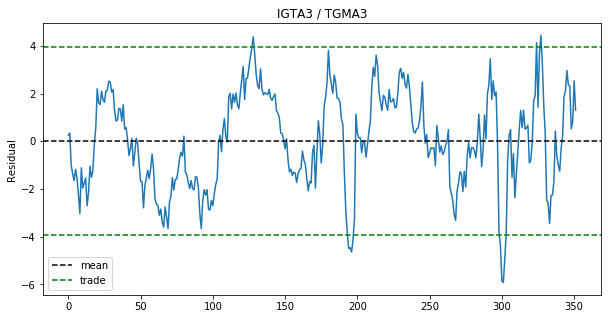

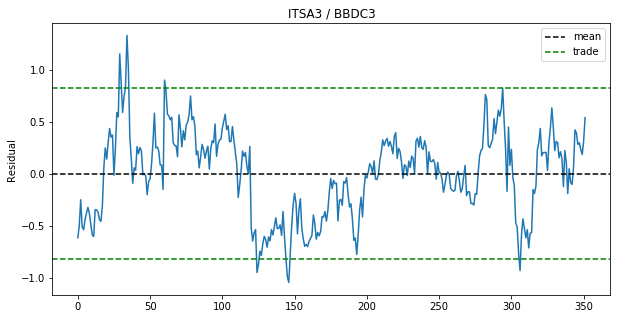

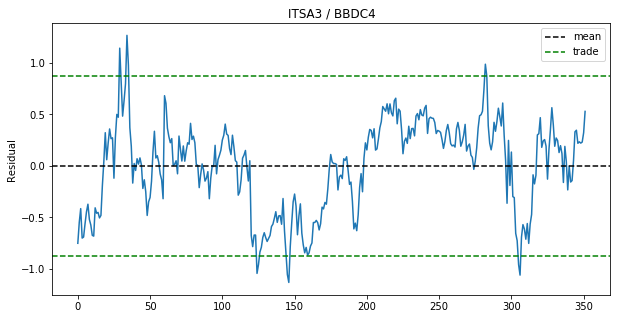

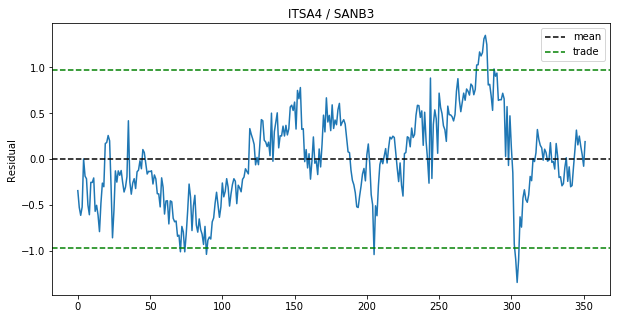

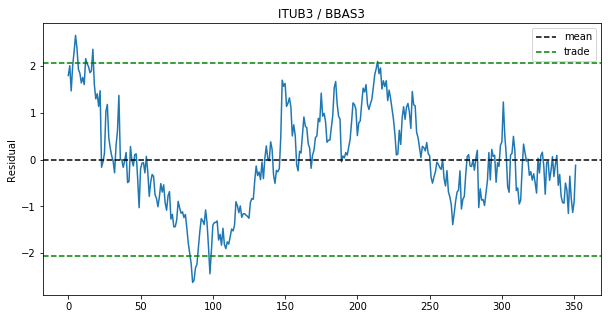

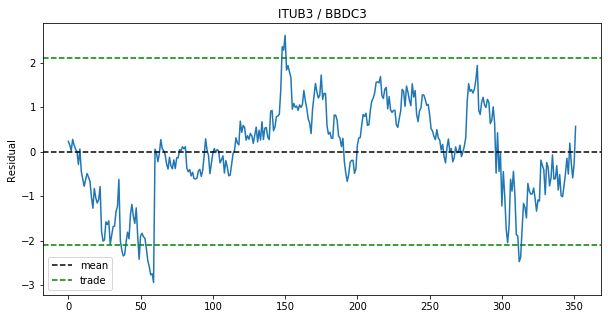

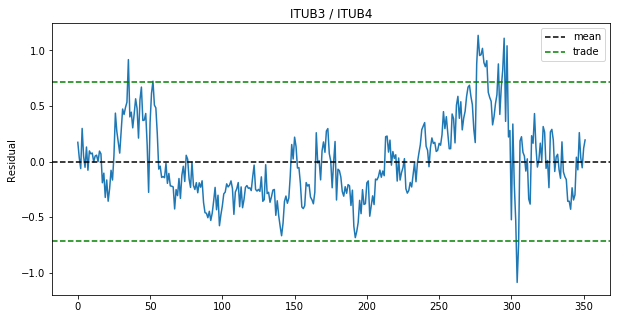

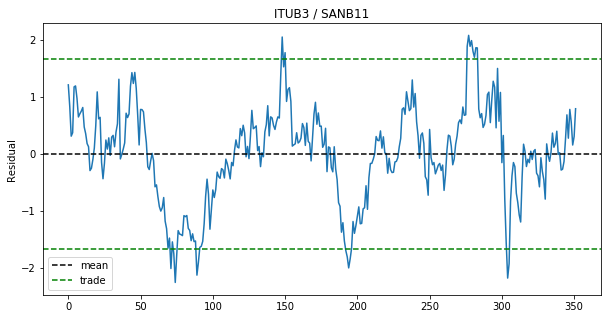

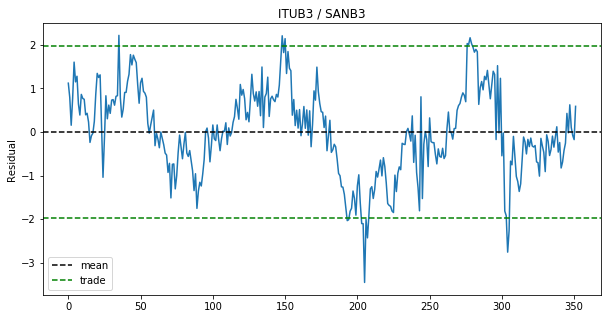

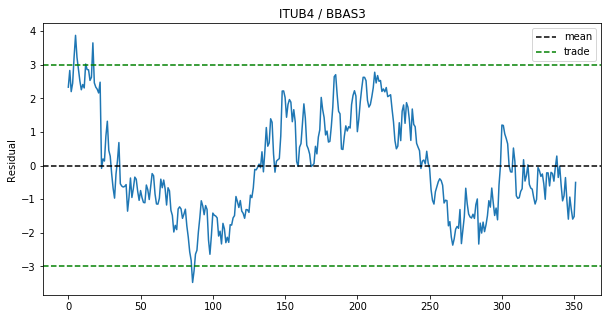

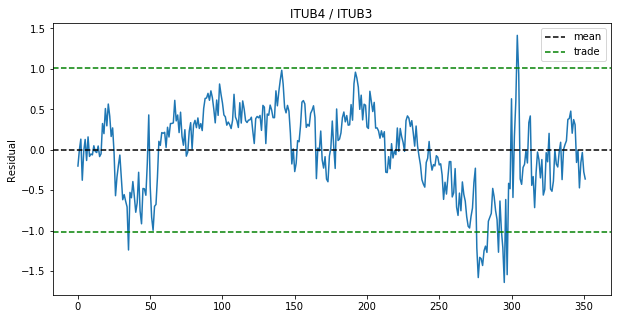

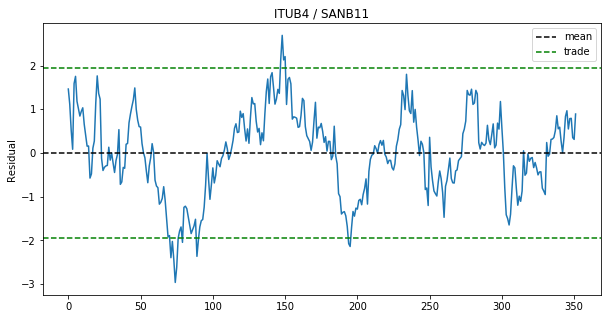

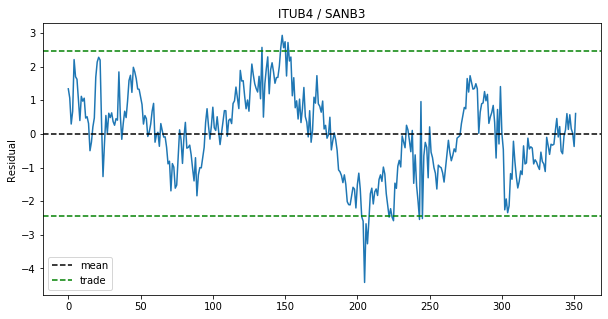

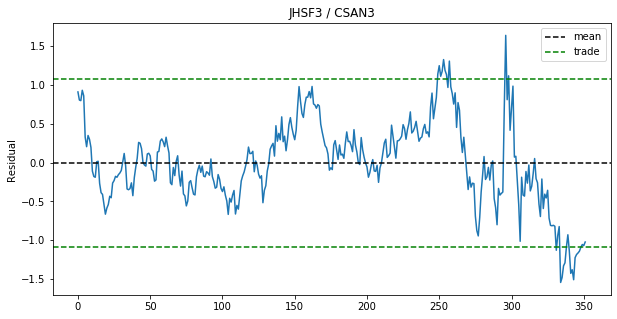

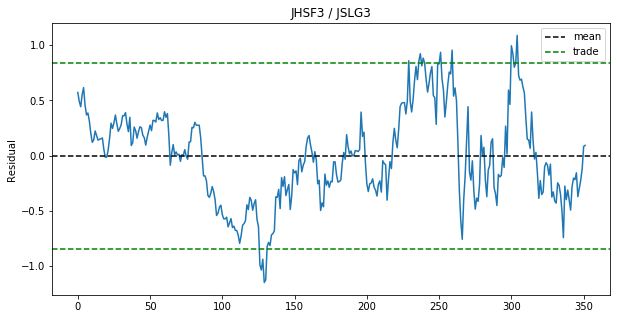

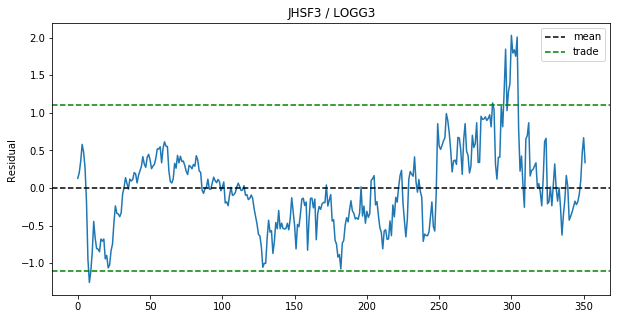

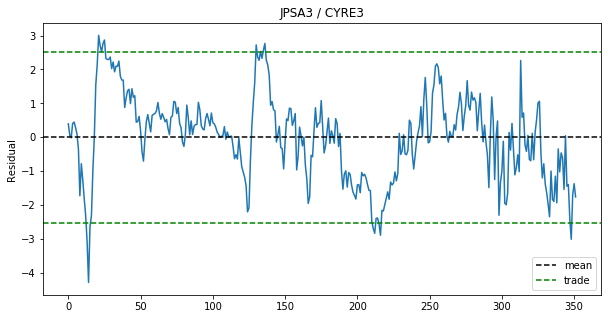

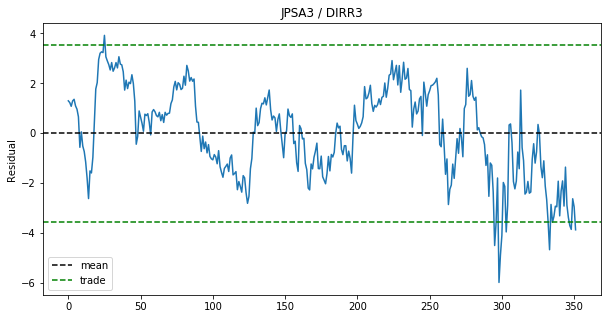

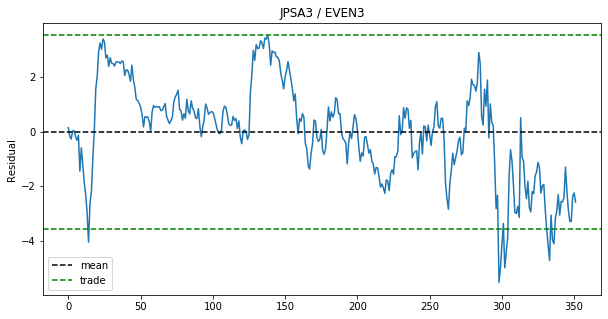

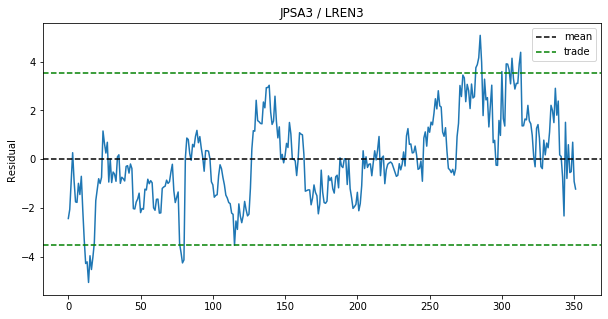

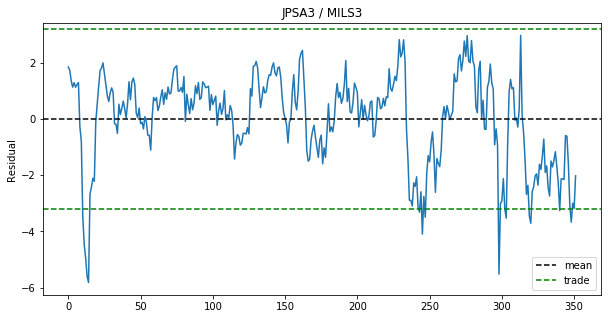

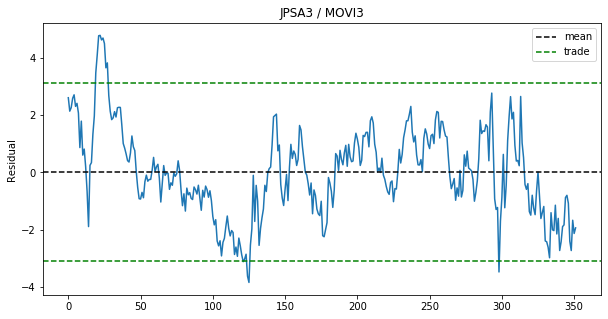

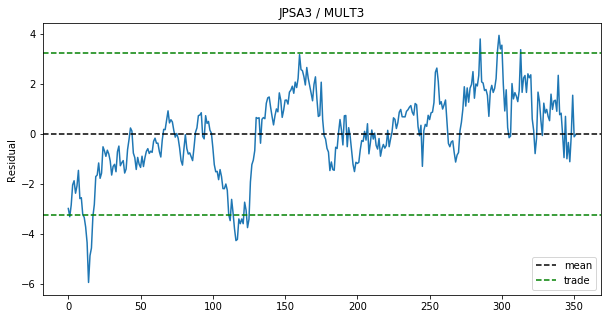

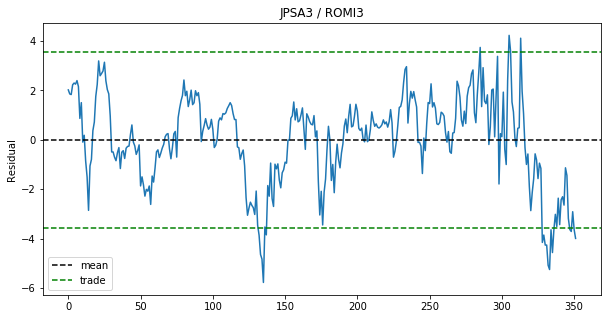

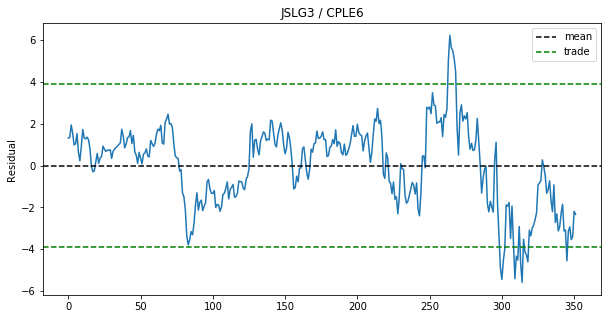

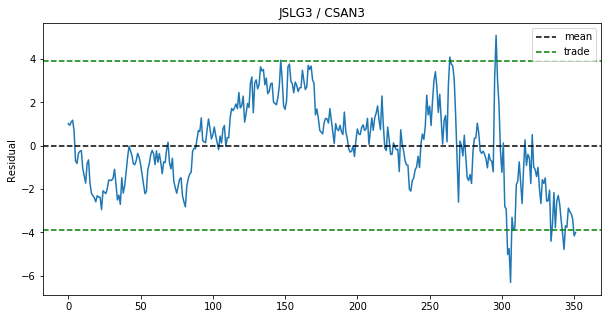

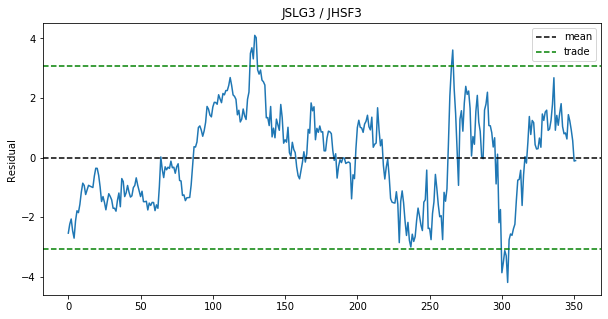

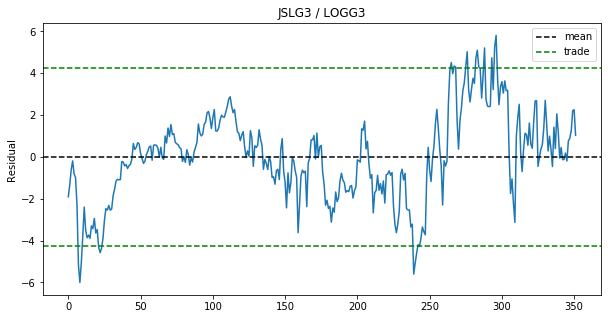

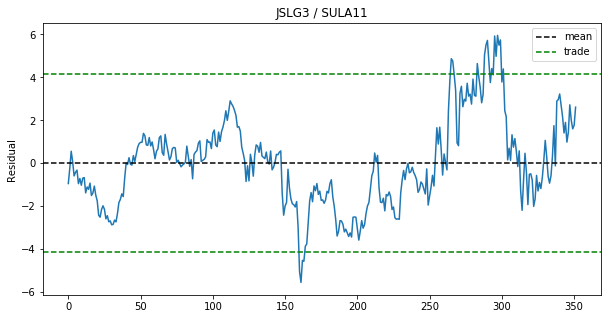

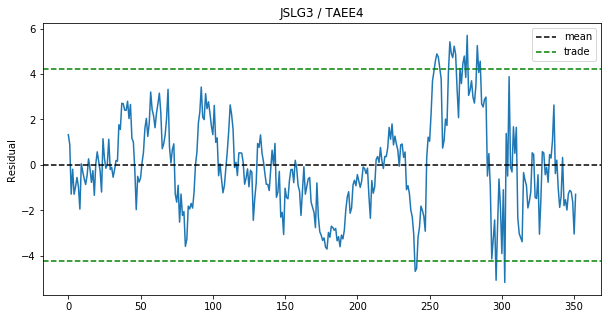

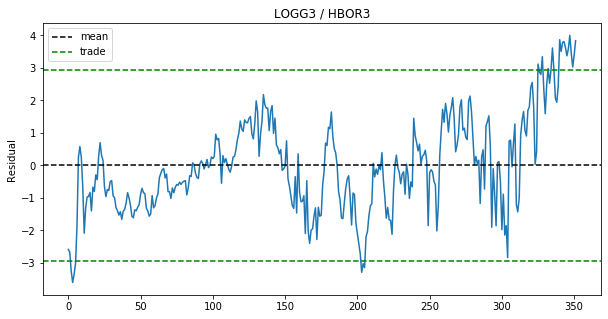

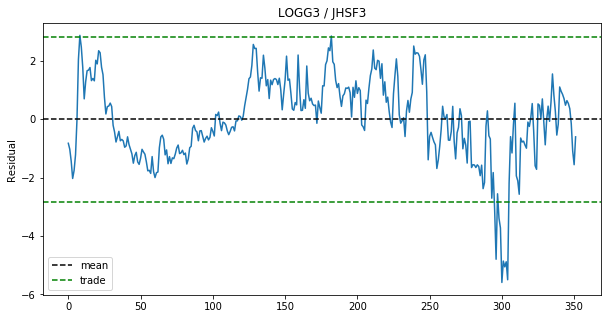

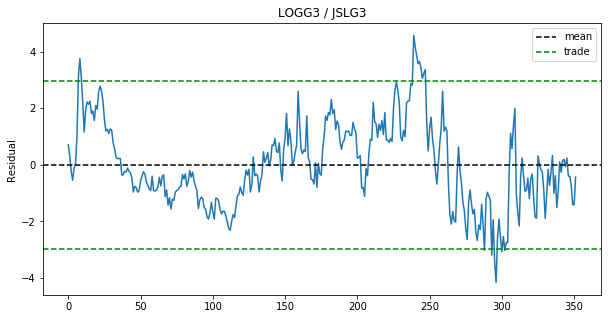

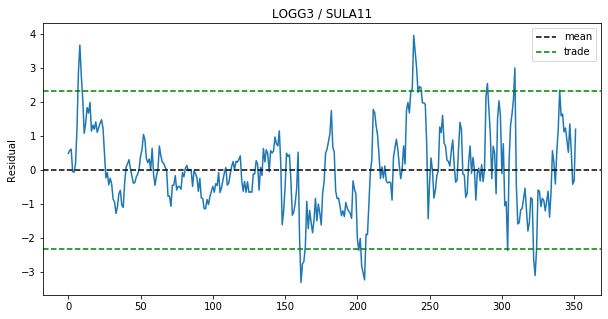

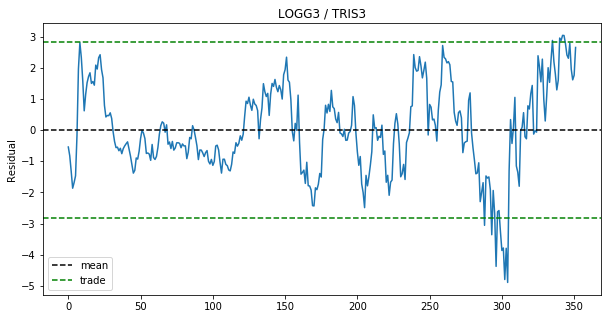

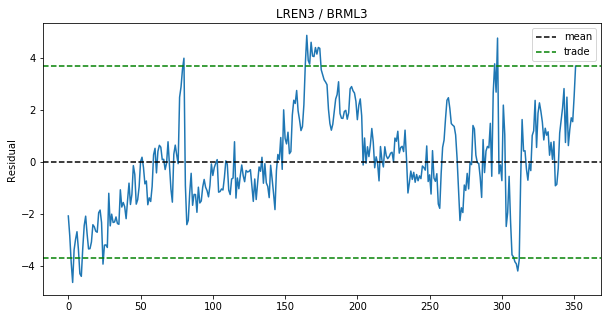

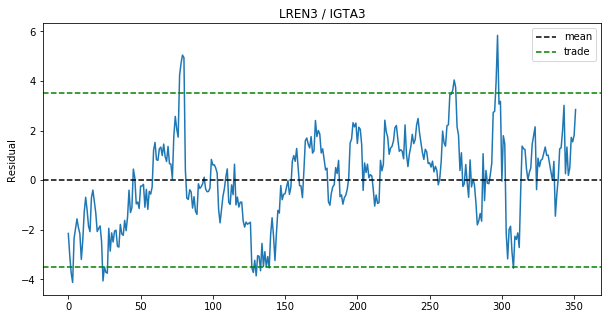

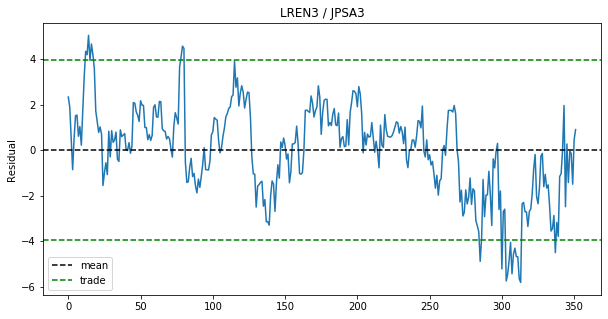

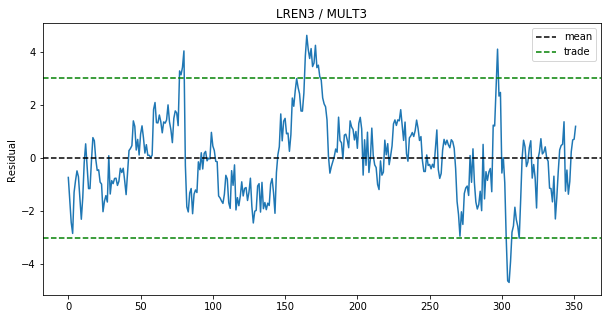

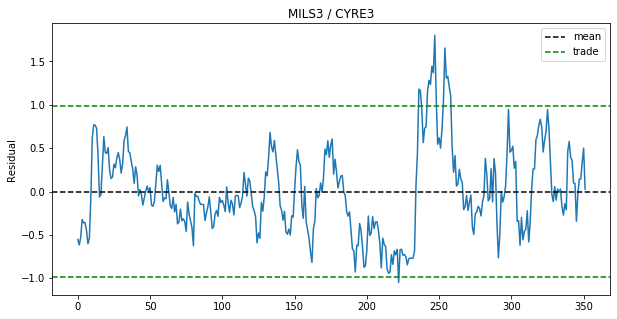

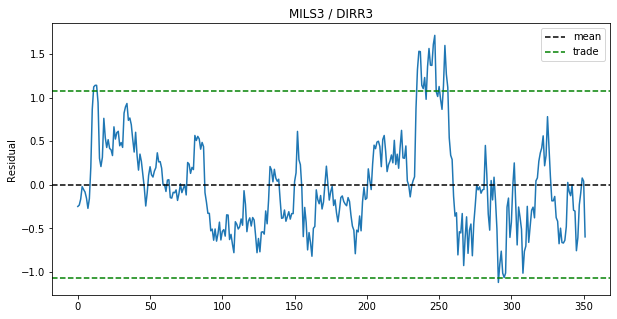

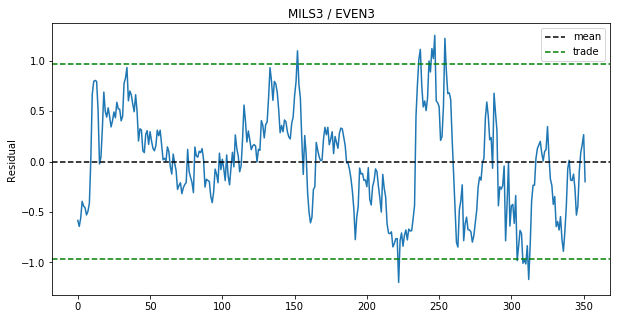

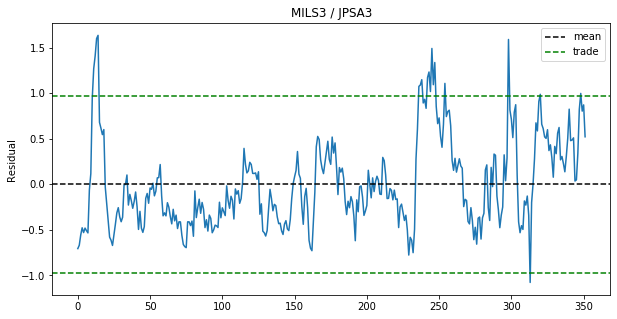

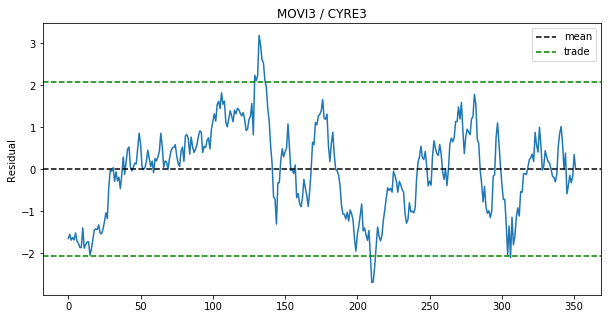

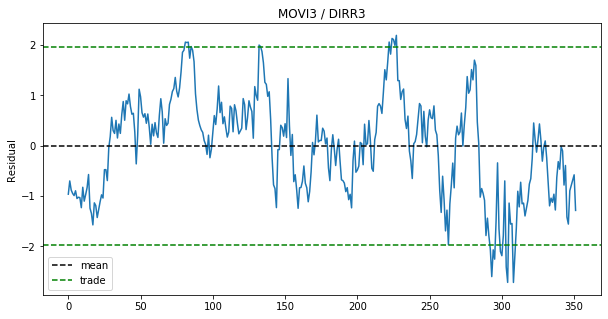

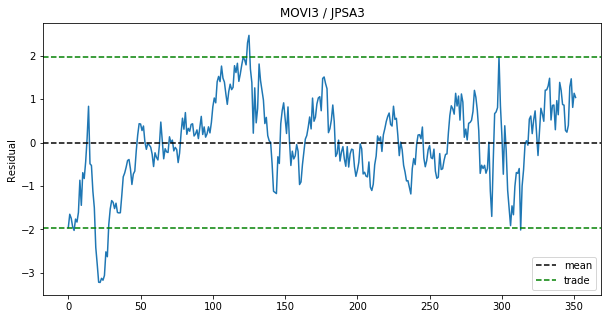

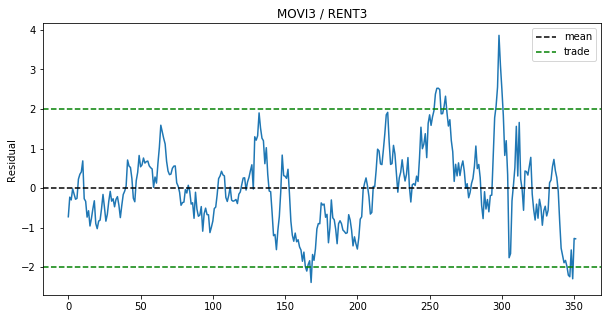

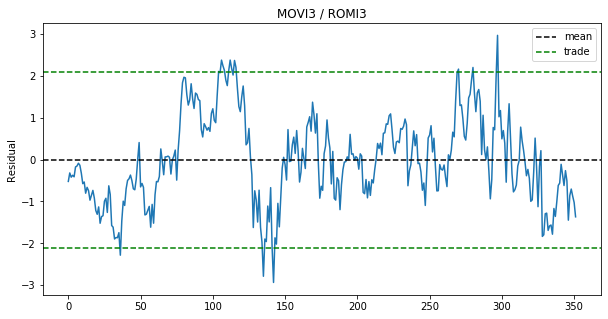

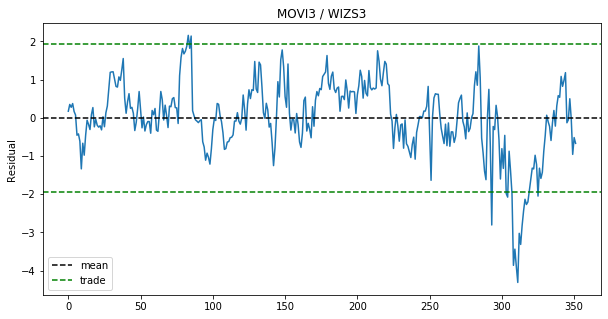

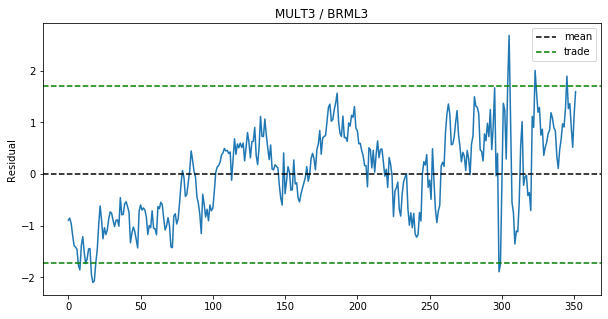

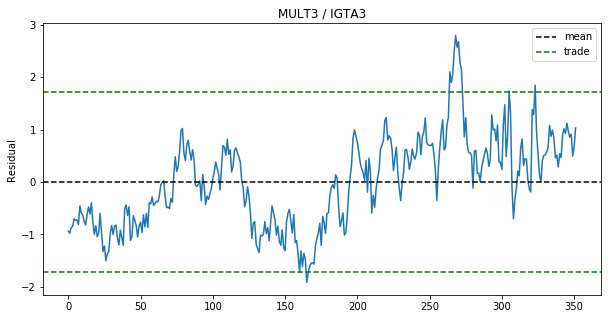

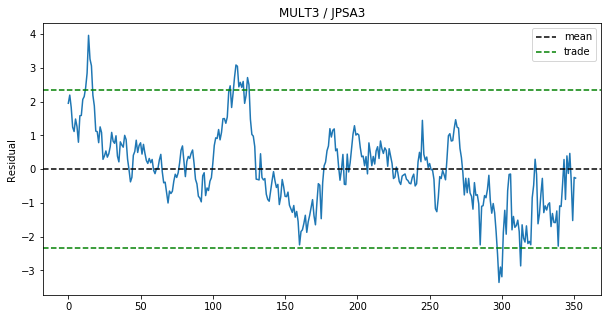

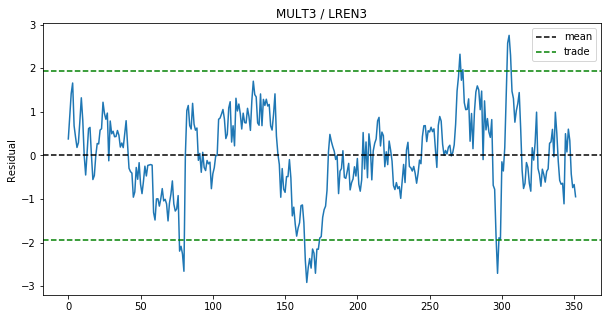

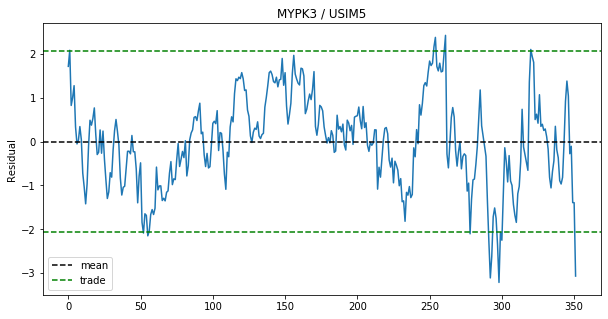

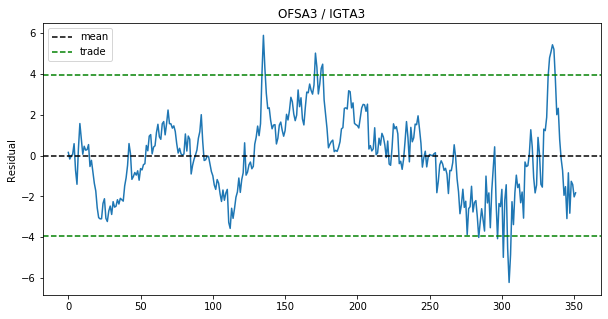

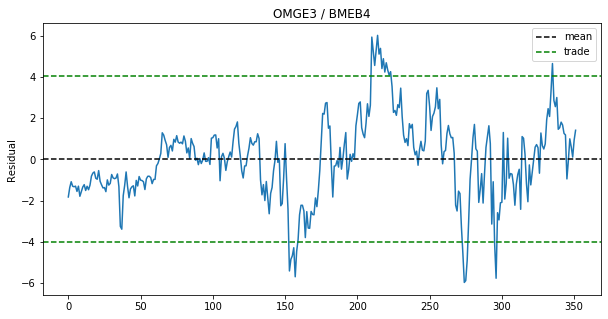

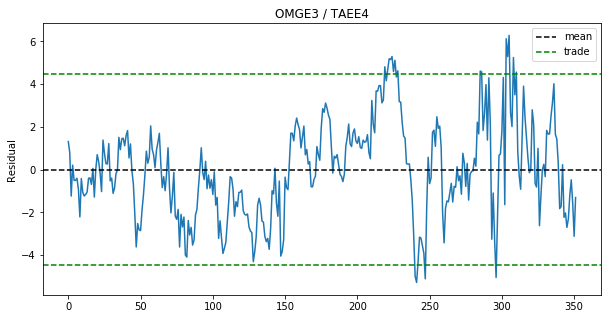

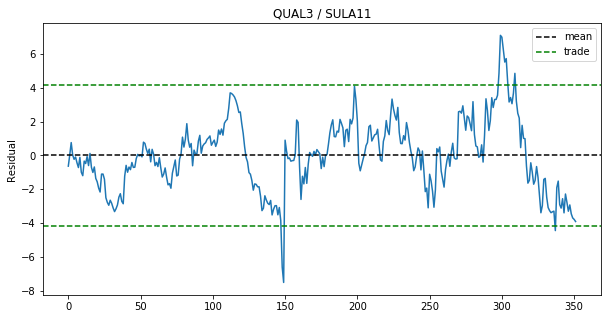

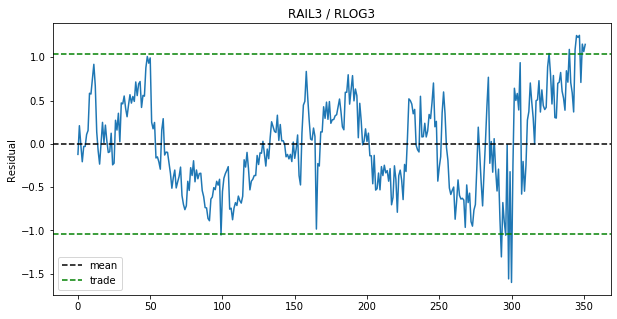

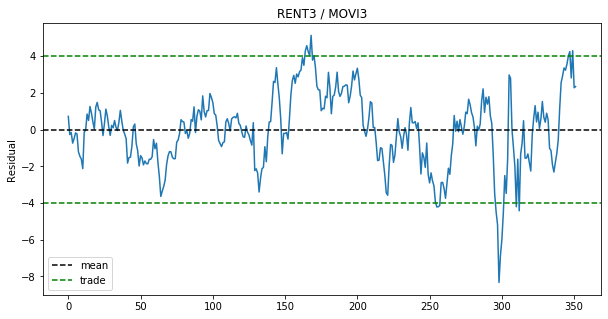

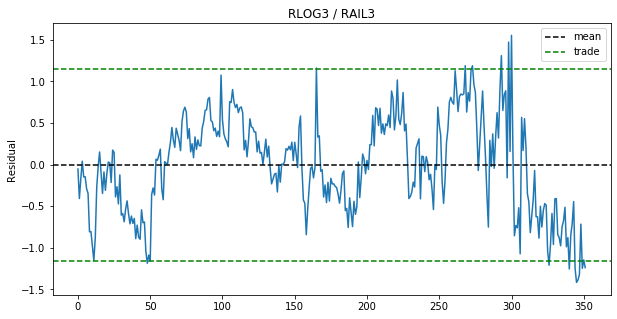

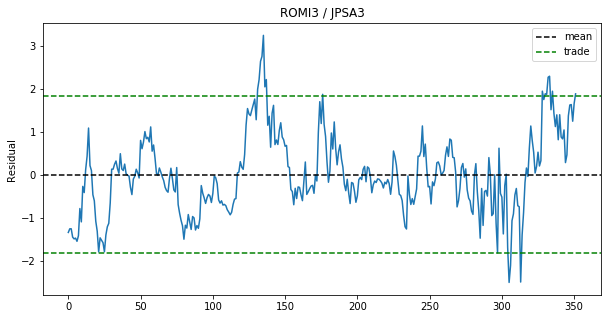

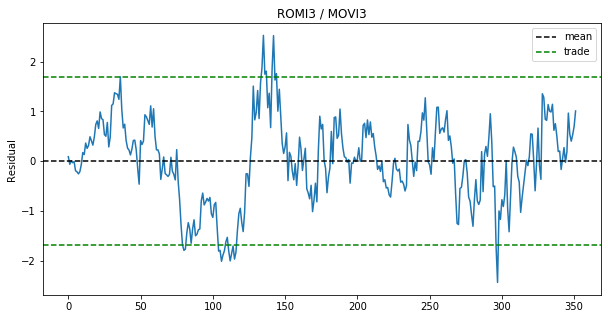

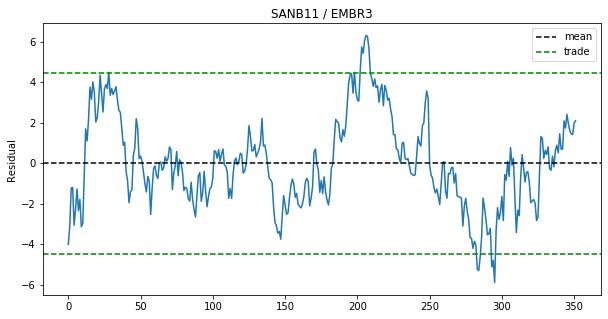

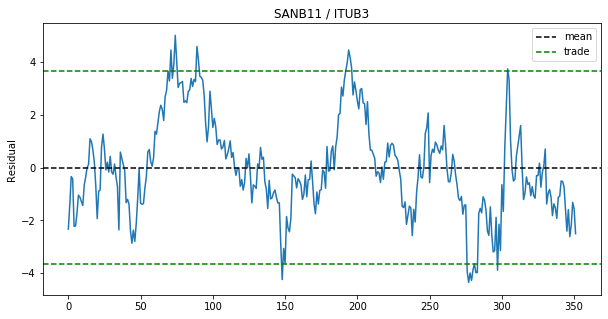

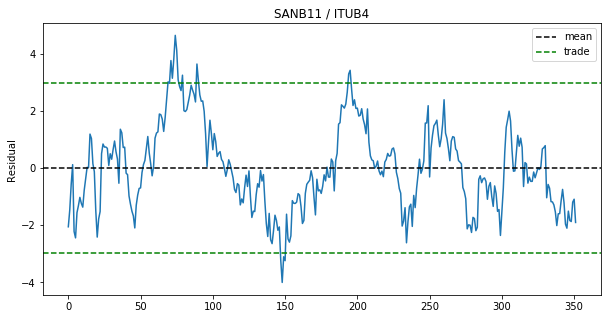

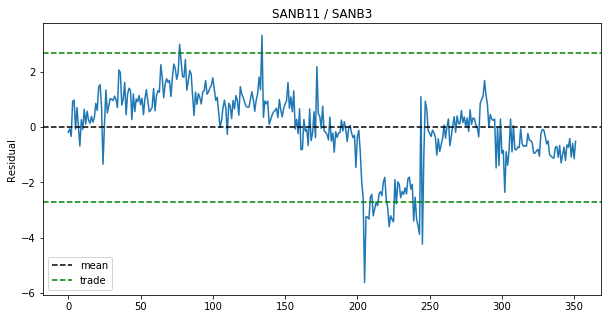

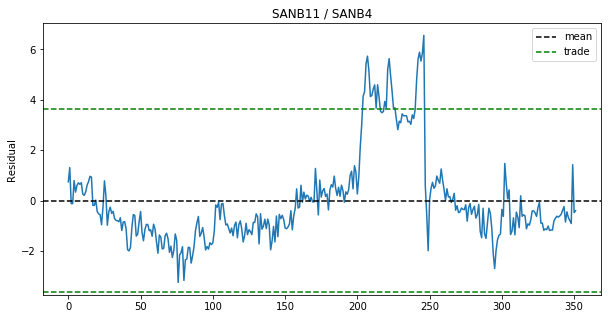

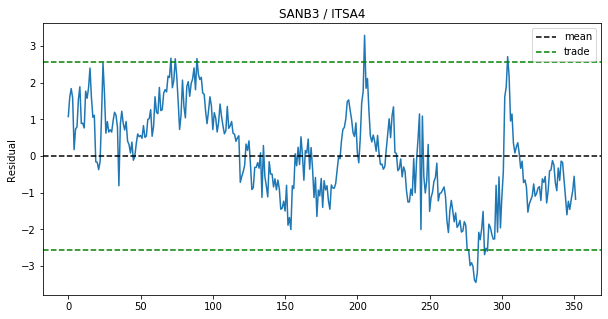

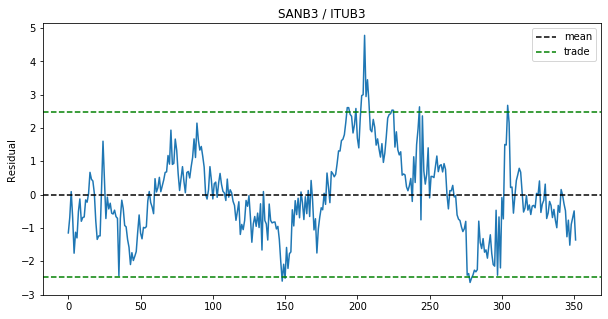

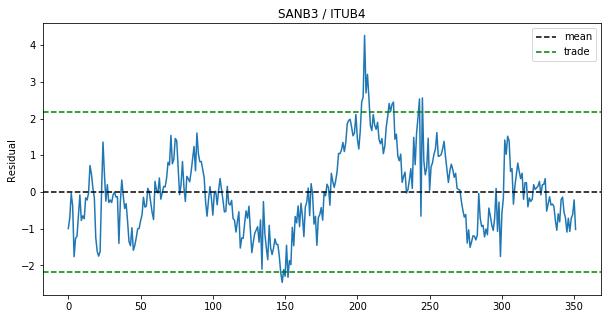

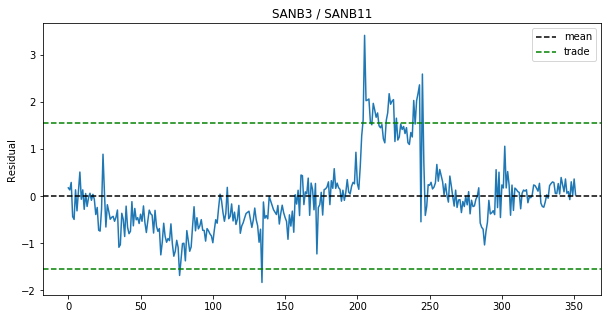

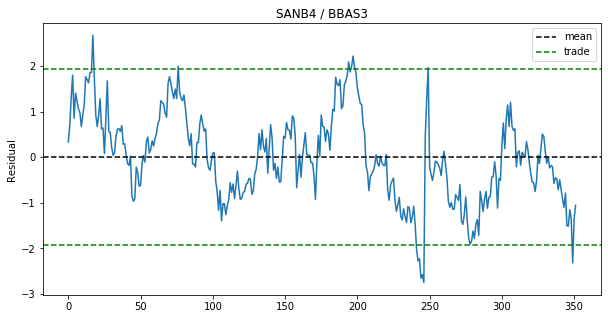

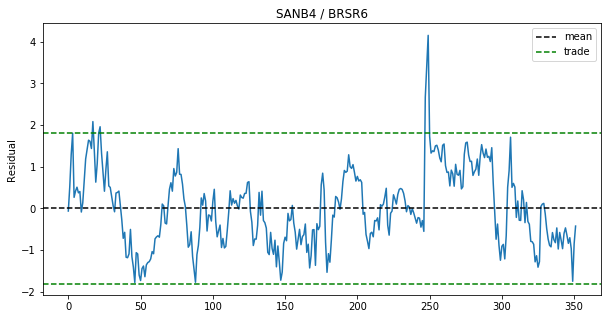

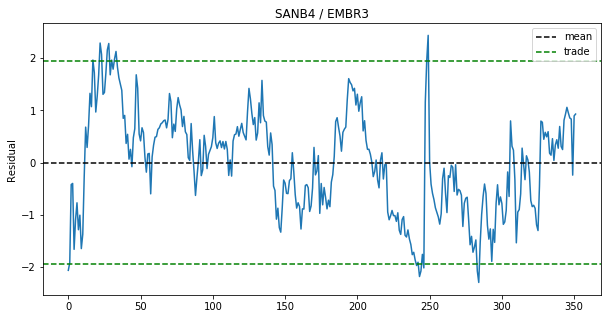

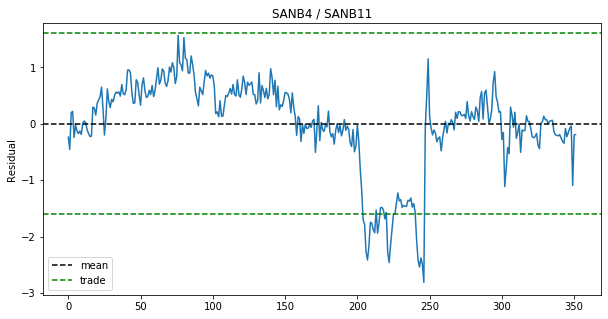

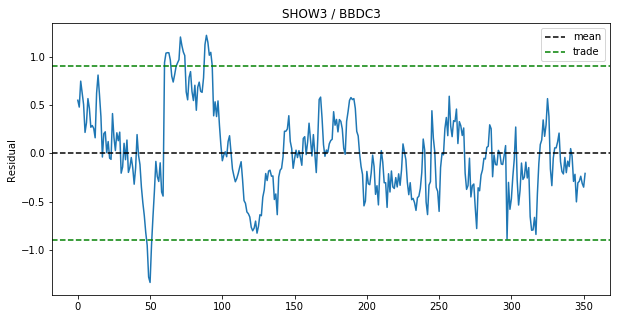

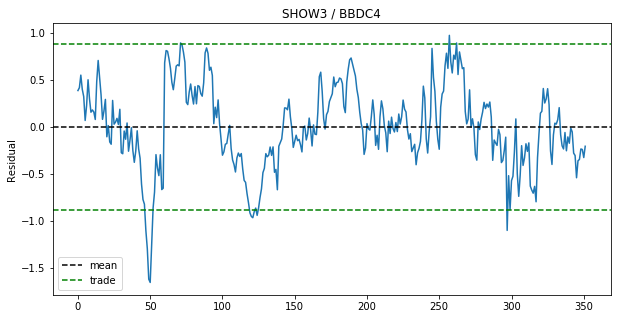

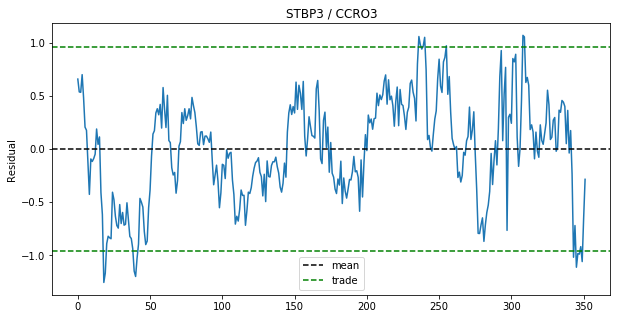

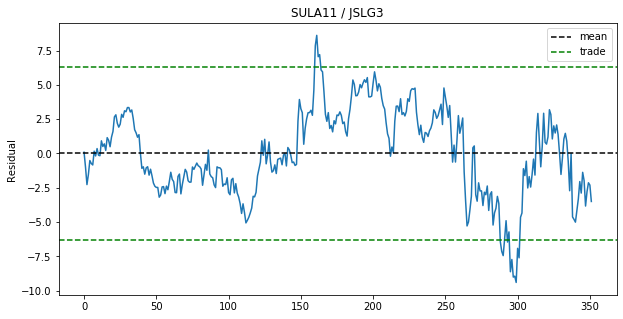

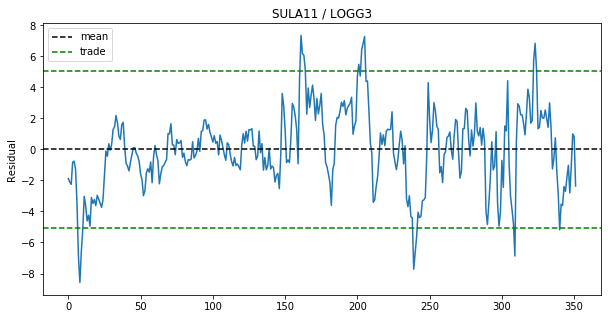

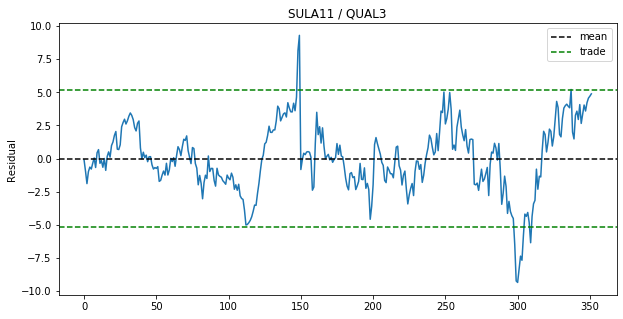

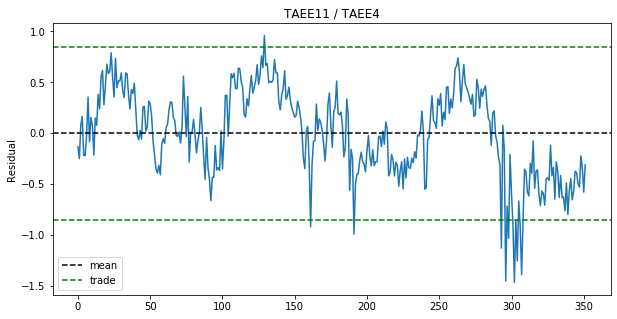

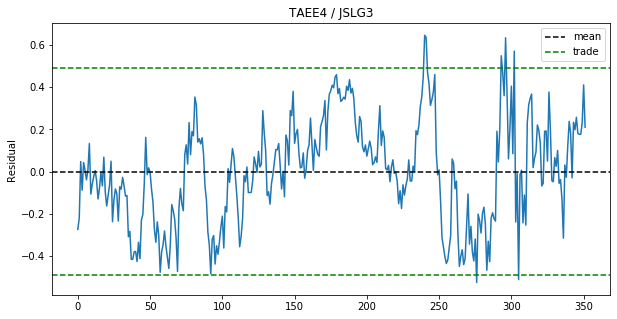

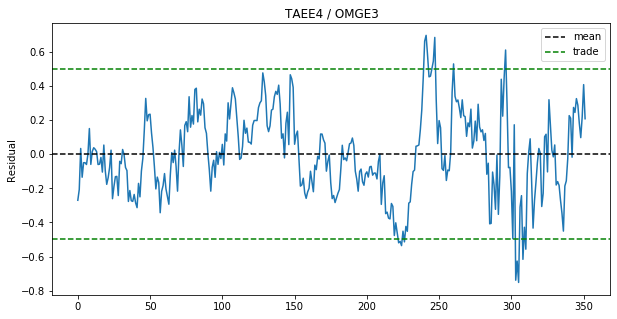

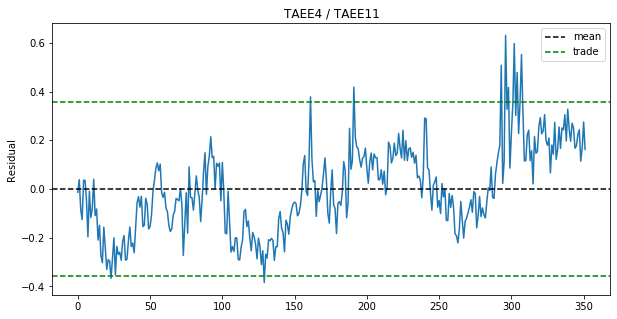

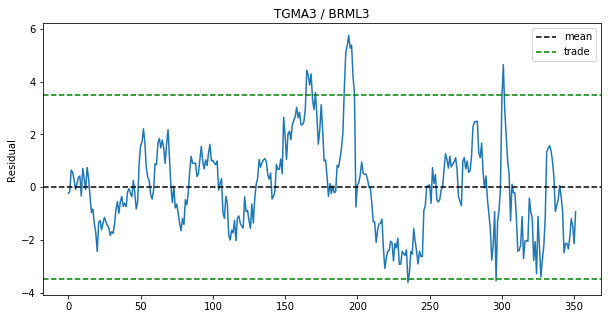

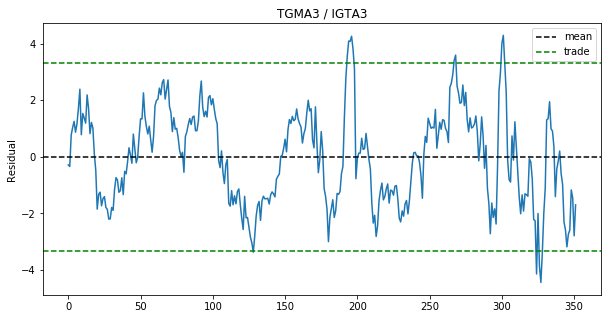

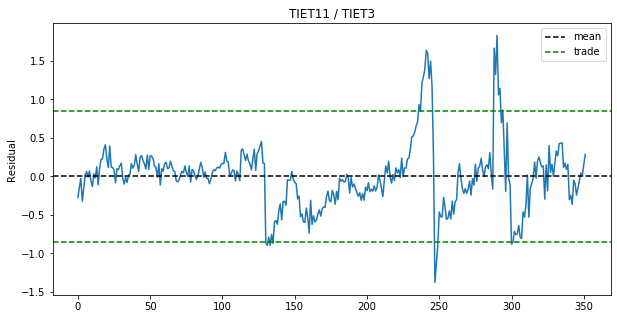

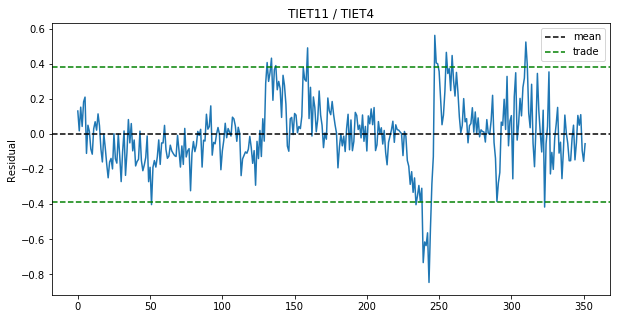

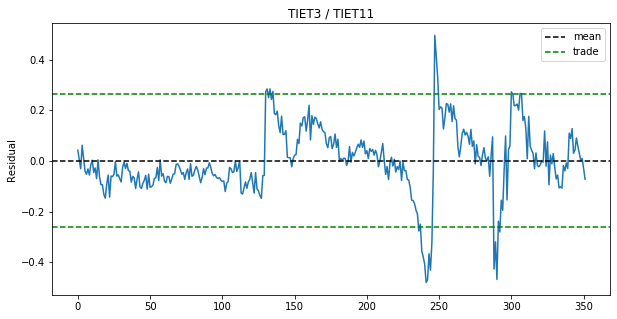

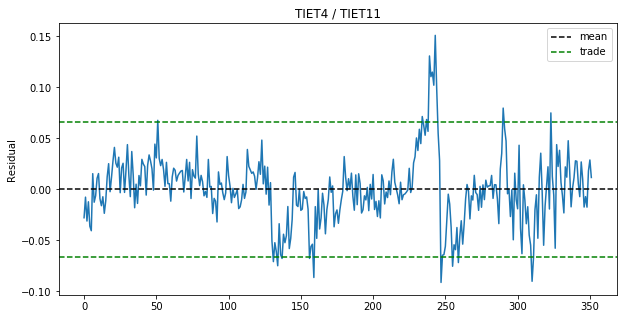

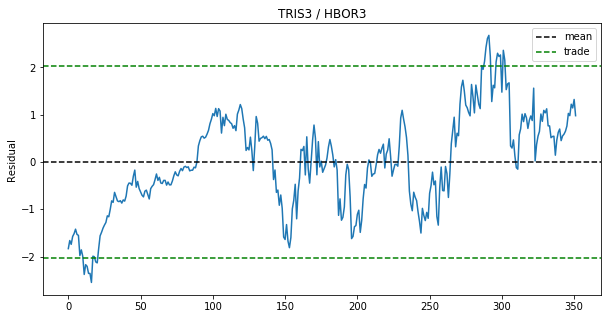

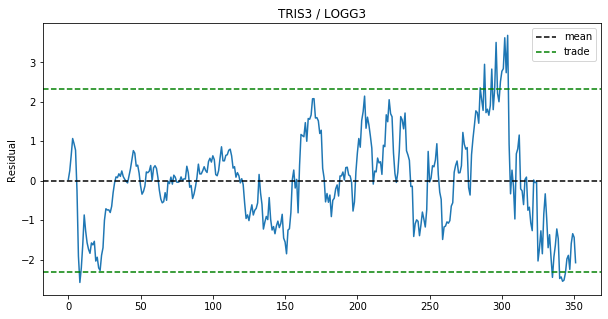

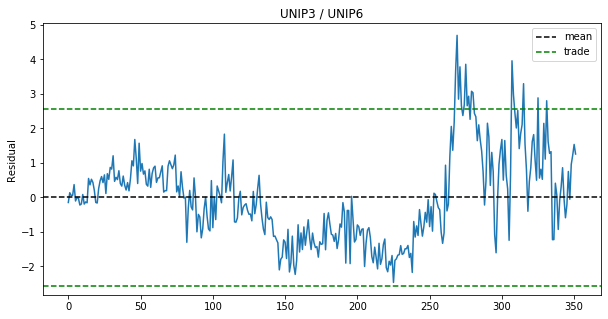

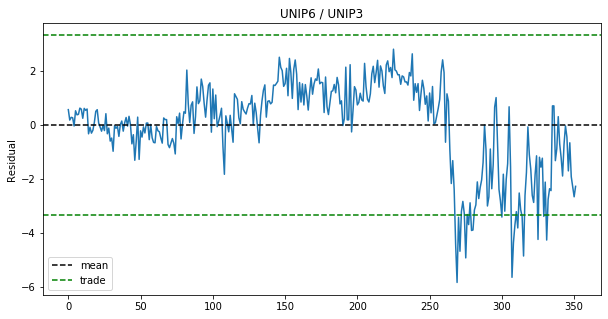

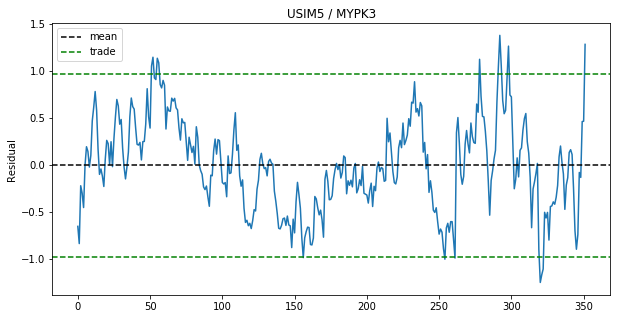

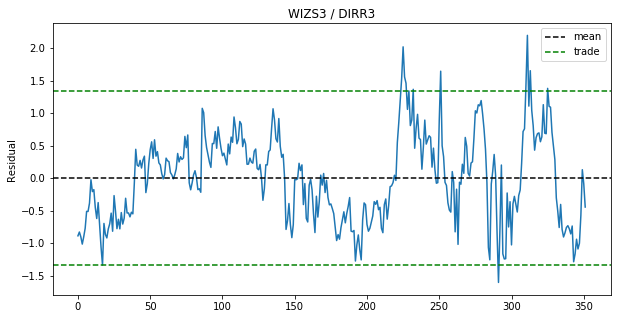

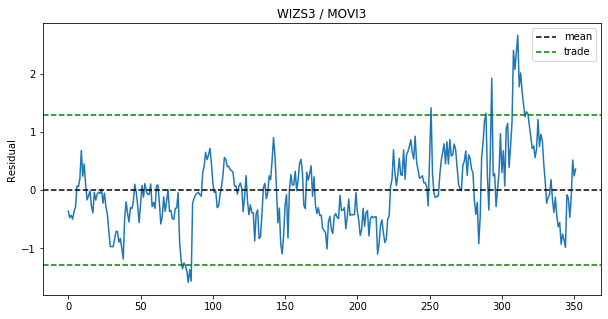

In [46]:
for i, j in corr.iterrows():
    show(data, j['Dependente'], j['Independente'])